# **Background of the Problem**

New York City Taxi and Limousine Commission (NYC TLC) memegang peranan krusial sebagai lembaga pengatur yang bertanggung jawab atas pengawasan industri transportasi, dengan misi untuk menciptakan lingkungan transportasi yang efisien untuk semua pihak yang terlibat. Oleh karena itu, NYC TLC ingin memahami pola operasional dan preferensi pelanggan.

### **Problem Statement** 
Berdasarkan informasi yang diperoleh dapat ditarik 3 pertanyaan terperinci sebagai panduan analisis:
1. **Optimasi efisiensi transportasi**: <br/>
    Bagaimana NYC TLC dapat meningkatkan efisiensi operasional industri transportasi di New York City untuk menciptakan lingkungan yang lebih efisien bagi semua pihak yang terlibat, termasuk pengemudi dan penumpang?

2. **Analisis pola operasional pengemudi**: <br/>
    Bagaimana NYC TLC dapat lebih memahami pola operasional pengemudi, termasuk waktu dan lokasi yang sering digunakan, untuk memberikan insight regulasi yang lebih baik, sehingga meningkatkan layanan?

3. **Peningkatan pengalaman pelanggan**: <br/>
    Bagaimana NYC TLC dapat meningkatkan pengalaman penumpang dengan memahami preferensi penumpnag?

### **Analysis Objectives**
Melalui analisis ini diharapkan NYC TLC dapat menciptakan lingkungan transportasi yang efisien, aman, dan memenuhi kebutuhan semua pihak yang terlibat, mencakup pengemudi, penumpang, dan lembaga itu sendiri. Ini menciptakan siklus positif di mana efisiensi operasional yang ditingkatkan, pemahaman yang lebih baik terhadap pola operasional, dan pelayanan yang lebih baik secara keseluruhan dapat mencapai misi NYC TLC.

# **Data**

### Importing Libraries and Dataset 

**Dataset Trip**:
- **VendorID**: Kode penyedia LPEP yang menyediakan rekaman data perjalanan; 1=Creative Mobile Technologies Inc. & 2=VeriFone Inc.
- **lpep_pickup_datetime**: Tanggal & waktu saat taximeter diaktifkan.
- **lpep_dropoff_datetime**: Tanggal & waktu saat taximeter dinonaktifkan.
- **Passenger_count**: Jumlah penumpang. Jumlah nilai yang dimasukkan pengemudi
- **trip_distance**: Jarak perjalanan yang ditempuh (mil).
- **PULocationID**: Kode lokasi penjemputan penumpang (saat taximeter diaktifkan).
- **DOLocationID**:  Kode lokasi penurunan penumpang (saat treximeter dinon-aktifkan).
- **RateCodeID**: Kode tarif final yang berlaku pada akhir perjalanan; 1=Standard rate , 2=JFK (airport), 3=Newark (airport), 4=Nassau/Westchester (batas luar kota), 5=Negotiated fare (luar kota) , 6=Group ride.
- **store_and_fwd_flag**: Tanda rekaman perjalanan disimpan sebelum dikirim ke vendor; Y=disimpan & N=tidak disimpan
- **payment_type**: 1=Credit Card, 2=Cash, 3=No Charge, 4=Dispute, 5=Unknown, 6=Voided trip.
- **fare_amount**: 0,50 dollar tarif waktu dan jarak dihitung oleh taximeter & 1 dollar jam sibuk & tambahan biaya per malam.
- **mta_tax**: Pajak MTA 0,50 dollar.
- **improvement_surcharge**: Tambahan biaya perbaikan sebesar 0,30 dollar.
- **tip_amount**: Tip kartu kredit, tip tunai tidak termasuk.
- **tolls_amount**: Jumlah biaya tol.
- **total_amount**: Jumlah total yang dibebankan kepada penumpang, tidak termasuk tip tunai.
- **trip_type**: Kode perjalana yang secara otomatis ditetapkan berdasarkan tarif yang digunakan oleh taximeter tetapi dapat diubah oleh pengemudi; 1=Street-hail (order di tempat) & 2=Dispatch (order melalui layanan).
- **congestion_surcharge**: Biaya tambahan ketika kemacetan sebesar 2.50 dollar (non-shared) dan 0.75 dollar (sharred). Hanya berlaku di wilayah Manhattan, south of 96th Street. 

**Dataset Location**:
- **LocationID**: Kode lokasi.
- **Borough**: Distrik pemerintahan kota NYC: Bronx, Brooklyn, Manhattan, Queens, dan Staten Island.
- **Zone**: Wilayah bagian NYC.
- **service_zone**: Wilayah layanan kendaraan.

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use('fivethirtyeight')
import plotly.express as px
import missingno as msno

df_trip = pd.read_csv('NYC TLC Trip Record.csv', dtype = {'store_and_fwd_flag' : str})
print('Dataset Trip')
display(df_trip.head())

df_location = pd.read_csv('taxi_zone_lookup.csv')
print('Dataset Location')
display(df_location.head())

pd.set_option('display.max_columns', None)

Dataset Trip


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


Dataset Location


,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


### Data Understanding

In [3]:
# sekilas mengenai info dataset trip
df_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [4]:
# sekilas mengenai statistika deskriptif dataset trip
print('Descriptive Stats for Number')
display(df_trip.describe(include='number'))
print('Descriptive Stats for Object')
display(df_trip.describe(include='object'))

Descriptive Stats for Number


,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


Descriptive Stats for Object


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


In [5]:
# mengidentifikasi duplikasi data
df_trip.duplicated().sum()

0

In [6]:
# mengidentifikasi duplikasi data menggunakan subset lpep_pickup_datetime dan lpep_dropoff_datetime
dup = df_trip[df_trip.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime'], keep=False)]
dup.head(6)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
166,2,2023-01-01 02:37:12,2023-01-01 02:37:15,N,5.0,51,264,3.0,0.00,40.0,0.0,0.0,0.0,0.0,NaN,1.0,41.0,1.0,2.0,0.0
173,2,2023-01-01 02:37:12,2023-01-01 02:37:15,N,5.0,260,264,1.0,0.00,20.0,0.0,0.0,4.2,0.0,NaN,1.0,25.2,1.0,2.0,0.0
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.0,0.0,-0.5,0.0,0.0,NaN,-1.0,-4.5,3.0,1.0,0.0
663,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,3.0,0.0,0.5,0.0,0.0,NaN,1.0,4.5,3.0,1.0,0.0
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,-3.0,0.0,-0.5,0.0,0.0,NaN,-1.0,-4.5,4.0,1.0,0.0
899,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,3.0,0.0,0.5,0.0,0.0,NaN,1.0,4.5,4.0,1.0,0.0


In [7]:
# mengidentifikasi columns yang memiliki missing values 
missing_values = df_trip.columns[df_trip.isna().any()]
missing_values_count = df_trip[missing_values].isna().sum()
missing_values_count

store_and_fwd_flag       4324
RatecodeID               4324
passenger_count          4324
ehail_fee               68211
payment_type             4324
trip_type                4334
congestion_surcharge     4324
dtype: int64

In [8]:
# mengidentifikasi value pada tiap column category
pd.set_option('display.max_colwidth', 1)
colls = ['VendorID', 'store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'payment_type', 'trip_type']

x = []
for i in colls:
    x.append( [i, df_trip[i].nunique(), df_trip[i].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'], data=x)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,store_and_fwd_flag,2,"[N, Y, nan]"
2,RatecodeID,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
3,passenger_count,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, 8.0, nan]"
4,payment_type,5,"[1.0, 2.0, 3.0, 4.0, 5.0, nan]"
5,trip_type,2,"[1.0, 2.0, nan]"


> Insight summary dataset trip:
> - Terdapat 7 columns yang memiliki banyak NaN (Not a Number) values, yakni `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `ehail_fee`, `payment_type`, `trip_type`, dan `congestion_surcharge`.
> - Column `lpep_pickup_datetime` dan `lpep_dropoff_datetime` seharusnya memiliki tipe data datetime, bukan string.
> - Columns yang berkaitan dengan biaya/tarif (`fare_amount`, `extra`, `mta_tax`, `tip_amount`, `improvement_surcharge`, `total_amount`, `congestion_surcharge`) memiliki min value yang negative. Seharusnya nilai biaya/tarif tidak bisa kurang dari 0.
> - Terdapat adanya indikasi duplicated data pada beberapa rows setelah menggunakan subset columns PULocationID dan DOLocationID.
> - Column `trip_distance` memiliki nilai min value 0, seharusnya untuk jarak tempuh tidak boleh 0 kecuali dengan kondisi mobil tidak bergerak sama sekali.
> - Column `ehail_fee` secara keseluruhan tidak memiliki value sama sekali.
> - Column `passenger_count` jumlah maksimalnya berjumlah 9, sedangkan berdasarkan aturan yang diterapkan, maksimal penumpang hanya boleh berjumlah 5. 
> - Value pada column  `payment_type`, `trip_type` dan `RatecodeID` memiliki value yang tidak sesuai dengan informasi yang tertera dan seharusnya memiliki tipe data category, bukan tipe float.
> - Tipe data `passenger_count` seharusnya memiliki tipe interger bukan float karena jumlah penumpang tidak mungkin dalam bentuk decimal.

In [9]:
# sekilas mengenai info dataset location
df_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       265 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


In [10]:
# sekilas mengenai statistika deskriptif dataset location
print('Descriptive Stats for Number')
display(df_location.describe(include='number'))
print('Descriptive Stats for Object')
display(df_location.describe(include='object'))

Descriptive Stats for Number


,LocationID
count,265.000000
mean,133.000000
std,76.643112
min,1.000000
25%,67.000000
50%,133.000000
75%,199.000000
max,265.000000


Descriptive Stats for Object


,Borough,Zone,service_zone
count,265,264,263
unique,7,261,4
top,Queens,Governor's Island/Ellis Island/Liberty Island,Boro Zone
freq,69,3,205


In [11]:
# mengidentifikasi duplikasi data location
df_location.duplicated().sum()

0

In [12]:
# mengidentifikasi duplikasi data menggunakan subset LocationID dan Zone
dup = df_location[df_location.duplicated(subset=['LocationID', 'Zone'], keep=False)]
dup.head(10)

,LocationID,Borough,Zone,service_zone


In [13]:
# mengidentifikasi value pada column Borough dan service_zone
pd.set_option('display.max_colwidth', 1)

pd.set_option('display.max_colwidth', 1)
colls = ['Borough', 'service_zone']

x = []
for i in colls:
    x.append( [i, df_location[i].nunique(), df_location[i].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'], data=x)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Borough,7,"[EWR, Queens, Bronx, Manhattan, Staten Island, Brooklyn, Unknown]"
1,service_zone,4,"[EWR, Boro Zone, Yellow Zone, Airports, nan]"


In [14]:
# mengidentifikasi columns yang memiliki missing values 
missing_values_loc = df_location.columns[df_location.isna().any()]
missing_values_loc_count = df_location[missing_values_loc].isna().sum()
missing_values_loc_count

Zone            1
service_zone    2
dtype: int64

> Insight summary dataset location:
> - Seharunya column `LocationID` memiliki tipe data category.
> - Terdapat missing values pada column `Zone` dan `service_zone`.
> - Pada column `Borough` terdapat value Unknown.

### Data Merging

In [15]:
# merge dataset trip dan dataset location dengan common column PULocationID dan DOLocationID
df = pd.merge(df_trip, df_location, left_on='PULocationID', right_on='LocationID', 
              how='left').rename(columns={'Borough': 'pickup_borough', 
                                          'Zone': 'pickup_zone', 
                                          'service_zone': 'pickup_service_zone'}).drop(['LocationID'], axis=1)

df = pd.merge(df, df_location, left_on='DOLocationID', right_on='LocationID', 
              how='left').rename(columns={'Borough': 'dropoff_borough', 
                                          'Zone': 'dropoff_zone', 
                                          'service_zone': 'dropoff_service_zone'}).drop(['LocationID'], axis=1)

df.head(2)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_borough,pickup_zone,pickup_service_zone,dropoff_borough,dropoff_zone,dropoff_service_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone


### Data Cleaning/Data Preparation

**Handling Duplicated Rows**

In [16]:
# mengidentifikasi duplikasi rows dengan subset columns
duplicated_rows = df[df.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationID', 'DOLocationID'], keep=False)]
print(f'Jumlah duplikasi pada rows: {len(duplicated_rows)}')
display(duplicated_rows.head(6))
display(duplicated_rows.tail(6))

Jumlah duplikasi pada rows: 348


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_borough,pickup_zone,pickup_service_zone,dropoff_borough,dropoff_zone,dropoff_service_zone
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.0,0.0,-0.5,0.0,0.0,NaN,-1.0,-4.5,3.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem North,Boro Zone
663,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,3.0,0.0,0.5,0.0,0.0,NaN,1.0,4.5,3.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem North,Boro Zone
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,-3.0,0.0,-0.5,0.0,0.0,NaN,-1.0,-4.5,4.0,1.0,0.0,Queens,Queensbridge/Ravenswood,Boro Zone,Queens,Queensbridge/Ravenswood,Boro Zone
899,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,3.0,0.0,0.5,0.0,0.0,NaN,1.0,4.5,4.0,1.0,0.0,Queens,Queensbridge/Ravenswood,Boro Zone,Queens,Queensbridge/Ravenswood,Boro Zone
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.6,-1.0,-0.5,0.0,0.0,NaN,-1.0,-11.1,3.0,1.0,0.0,Queens,Jackson Heights,Boro Zone,Queens,Elmhurst,Boro Zone
1318,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,8.6,1.0,0.5,0.0,0.0,NaN,1.0,11.1,3.0,1.0,0.0,Queens,Jackson Heights,Boro Zone,Queens,Elmhurst,Boro Zone


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_borough,pickup_zone,pickup_service_zone,dropoff_borough,dropoff_zone,dropoff_service_zone
63655,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1.0,74,74,1.0,0.00,-2.5,-0.5,-0.5,0.0,0.0,NaN,-0.3,-3.8,3.0,1.0,0.0,Manhattan,East Harlem North,Boro Zone,Manhattan,East Harlem North,Boro Zone
63656,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1.0,74,74,1.0,0.00,2.5,0.5,0.5,0.0,0.0,NaN,0.3,3.8,3.0,1.0,0.0,Manhattan,East Harlem North,Boro Zone,Manhattan,East Harlem North,Boro Zone
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,-3.7,-1.0,-0.5,0.0,0.0,NaN,-1.0,-6.2,3.0,1.0,0.0,Brooklyn,Williamsburg (South Side),Boro Zone,Brooklyn,Williamsburg (South Side),Boro Zone
63808,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,3.7,1.0,0.5,0.0,0.0,NaN,1.0,6.2,3.0,1.0,0.0,Brooklyn,Williamsburg (South Side),Boro Zone,Brooklyn,Williamsburg (South Side),Boro Zone
63868,2,2023-01-31 23:44:44,2023-01-31 23:45:15,N,5.0,264,264,1.0,0.00,-10.0,0.0,0.0,0.0,0.0,NaN,-1.0,-11.0,4.0,2.0,0.0,Unknown,NV,NaN,Unknown,NV,NaN
63869,2,2023-01-31 23:44:44,2023-01-31 23:45:15,N,5.0,264,264,1.0,0.00,10.0,0.0,0.0,0.0,0.0,NaN,1.0,11.0,4.0,2.0,0.0,Unknown,NV,NaN,Unknown,NV,NaN


In [17]:
# menghapus duplikasi dengan hanya mempertahankan rows terakhir 
print(f'Shape sebelum dibersihkan: {df.shape}')
df = df.drop_duplicates(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationID', 'DOLocationID'], keep='last')
print(f'Shape sesudah dibersihkan: {df.shape}')

Shape sebelum dibersihkan: (68211, 26)
Shape sesudah dibersihkan: (68037, 26)


> - Dalam case ini subset yang relevan untuk mendeteksi duplikasi digunakan sebagai pembatasan pencarian duplikasi. Setelah dikaji ternyata terdapat duplikasi antara rows dengan columns yang berkaitan dengan biaya/tarif, yakni columns `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `improvement_surcharge`, `total_amount`, dan `congestion_surcharge`, columns tersebut memiliki values yang positive dan negative. Hal ini mencerminkan kesalahan yang terlihat pada tahap data understanding mengenai negative values pada column yang berkaitan dengan biaya/tarif.
> - Dapat diasumsikan hal ini terjadi karena data entry error, sehingga untuk mengatasinya positive values akan dipertahankan dan negative values akan dihapus.

**Handling Negative Values**

In [18]:
# mengidentifikasi negative values
df_num = df.select_dtypes(include='number')
negative_columns = df_num.columns[(df_num < 0).any()]

negative_counts = df[negative_columns].lt(0).sum()
total_negative_values = df[negative_columns].lt(0).sum().sum()
print(f'Jumlah total negative values: {total_negative_values}')
print('\nJumlah negative values tiap column: ')
print(negative_counts.to_string(header=None))

Jumlah total negative values: 10

Jumlah negative values tiap column: 
fare_amount     5
total_amount    5


In [19]:
# menghapus negative values pada dataset
print(f'Shape sebelum dibersihkan: {df.shape}')
colls = ['fare_amount', 'total_amount']
df = df.loc[~((df['fare_amount'] < 0) & (df['total_amount'] < 0))].reset_index(drop=True)
print(f'Shape sesudah dibersihkan: {df.shape}')

Shape sebelum dibersihkan: (68037, 26)
Shape sesudah dibersihkan: (68032, 26)


> Berkaca dari duplicated rows sebelumnya menandakan bahwa negative values diasumsikan sebagai kesalahan dalam data entry, sehingga dalam case ini negative values juga akan dihapus.

**Handling Value Error**

In [20]:
# mengidentifikasi column lpep_pickup_datetime dan lpep_dropoff_datetime yang memiliki kesamaan datetime
error_record_time = df[df['lpep_pickup_datetime'] == df['lpep_dropoff_datetime']]
print(f'Jumlah rows pada lpep_pickup_datetime dan lpep_dropoff_datetime yang memiliki kesamaan datetime: {len(error_record_time)}')
error_record_time.head()

Jumlah rows pada lpep_pickup_datetime dan lpep_dropoff_datetime yang memiliki kesamaan datetime: 61


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_borough,pickup_zone,pickup_service_zone,dropoff_borough,dropoff_zone,dropoff_service_zone
1244,2,2023-01-01 22:14:04,2023-01-01 22:14:04,N,1.0,226,264,1.0,0.0,3.0,1.0,0.5,10.0,0.0,NaN,1.0,15.5,1.0,1.0,0.0,Queens,Sunnyside,Boro Zone,Unknown,NV,NaN
2009,1,2023-01-02 15:17:46,2023-01-02 15:17:46,Y,1.0,3,264,2.0,0.0,24.0,0.0,1.5,0.0,0.0,NaN,1.0,25.5,2.0,1.0,0.0,Bronx,Allerton/Pelham Gardens,Boro Zone,Unknown,NV,NaN
2082,2,2023-01-02 15:02:08,2023-01-02 15:02:08,N,1.0,264,264,1.0,0.0,3.0,0.0,0.5,0.0,0.0,NaN,1.0,4.5,2.0,1.0,0.0,Unknown,NV,NaN,Unknown,NV,NaN
2340,1,2023-01-02 18:38:48,2023-01-02 18:38:48,Y,1.0,145,264,1.0,0.0,3.7,0.0,1.5,0.0,0.0,NaN,1.0,5.2,2.0,1.0,0.0,Queens,Long Island City/Hunters Point,Boro Zone,Unknown,NV,NaN
2700,2,2023-01-02 22:28:26,2023-01-02 22:28:26,N,5.0,255,264,2.0,0.0,40.0,0.0,0.0,0.0,0.0,NaN,0.0,40.0,1.0,2.0,0.0,Brooklyn,Williamsburg (North Side),Boro Zone,Unknown,NV,NaN


In [21]:
# menghapus column lpep_pickup_datetime dan lpep_dropoff_datetime yang memiliki kesamaan datetime
df = df.loc[~((df['lpep_pickup_datetime'] == df['lpep_dropoff_datetime']))].reset_index(drop=True)

> - Terdapat 61 rows pada  column `lpep_pickup_datetime` dan `lpep_dropoff_datetime` yang memiliki kesamaan datetime. Dapat diasumsikan hal ini terjadi karena data entry error, sehingga data waktu antara penjemputan dan penurunan penumpang tidak tercatat oleh mesin. Hal ini tercermin dari column `trip_distance` yang memiliki value 0.
> - Dalam case ini rows yang memiliki kesamaan datetime akan dihapus karena akan menimbulkan bias pada interpretasi data dan membuat error ketika akan membuat column untuk mengetahui kecepatan berkendara karena membutuhkan informasi antara penjemputan dan penurunan penumpang.

In [22]:
# mengidentifikasi datetime di luar tahun 2023 dan bulan Janurai
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

datetime_error = df[~((df['lpep_pickup_datetime'].dt.year == 2023) & (df['lpep_pickup_datetime'].dt.month == 1) |
                      (df['lpep_dropoff_datetime'].dt.year == 2023) & (df['lpep_dropoff_datetime'].dt.month == 1))]


print(f'Jumlah datetime di luar tahun 2023 dan di Bulan Januari: {len(datetime_error)}')
datetime_error.head()

Jumlah datetime di luar tahun 2023 dan di Bulan Januari: 4


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_borough,pickup_zone,pickup_service_zone,dropoff_borough,dropoff_zone,dropoff_service_zone
298,2,2022-12-09 14:10:49,2022-12-09 14:22:26,N,1.0,7,56,1.0,5.37,16.0,0.0,0.5,0.00,0.00,NaN,0.3,16.80,2.0,1.0,0.00,Queens,Astoria,Boro Zone,Queens,Corona,Boro Zone
318,2,2022-12-09 14:55:42,2022-12-09 15:33:06,N,1.0,260,164,1.0,5.48,25.5,0.0,0.5,0.00,6.55,NaN,0.3,35.60,2.0,1.0,2.75,Queens,Woodside,Boro Zone,Manhattan,Midtown South,Yellow Zone
17784,2,2009-01-01 20:21:27,2009-01-02 11:07:31,N,1.0,65,178,1.0,7.72,34.5,0.0,0.5,7.20,0.00,NaN,1.0,43.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,Brooklyn,Ocean Parkway South,Boro Zone
24985,2,2023-02-01 03:10:05,2023-02-01 03:40:35,N,5.0,82,198,2.0,4.58,28.0,0.0,0.0,5.66,0.00,NaN,0.3,33.96,1.0,2.0,0.00,Queens,Elmhurst,Boro Zone,Queens,Ridgewood,Boro Zone


In [23]:
# memfilter datetime di luar tahun 2023 dan Bulan Januari
df = df[df['lpep_pickup_datetime'].dt.year == 2023]
df = df[df['lpep_pickup_datetime'].dt.month == 1]

df = df[df['lpep_dropoff_datetime'].dt.year == 2023]
df = df[df['lpep_dropoff_datetime'].dt.month == 1]

> Datetime di luar tahun 2023 dan bulan Januari perlu dihapus karena data tersebut tidak relevan dengan lingkup waktu yang ingin dianalisis.

In [24]:
# mengidentifikasi error value pada column RatecodeID
val_error = df[df['RatecodeID'] == 99]
print(f'Jumlah error value pada column RatecodeID: {len(val_error)}')
val_error.head()

Jumlah error value pada column RatecodeID: 10


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_borough,pickup_zone,pickup_service_zone,dropoff_borough,dropoff_zone,dropoff_service_zone
1082,1,2023-01-01 19:44:13,2023-01-01 19:58:30,N,99.0,150,55,1.0,3.3,18.2,0.0,1.5,0.0,0.0,NaN,1.0,19.7,1.0,NaN,0.0,Brooklyn,Manhattan Beach,Boro Zone,Brooklyn,Coney Island,Boro Zone
2165,1,2023-01-02 16:39:05,2023-01-02 17:31:42,N,99.0,73,82,1.0,3.7,23.5,0.0,1.5,0.0,0.0,NaN,1.0,25.0,1.0,NaN,0.0,Queens,East Flushing,Boro Zone,Queens,Elmhurst,Boro Zone
8997,1,2023-01-05 20:33:45,2023-01-05 22:46:41,N,99.0,14,123,1.0,6.2,28.2,0.0,1.5,0.0,0.0,NaN,1.0,29.7,1.0,NaN,0.0,Brooklyn,Bay Ridge,Boro Zone,Brooklyn,Homecrest,Boro Zone
14052,1,2023-01-08 11:36:41,2023-01-08 12:14:59,N,99.0,61,77,1.0,2.7,22.5,0.0,1.5,0.0,0.0,NaN,1.0,24.0,1.0,NaN,0.0,Brooklyn,Crown Heights North,Boro Zone,Brooklyn,East New York/Pennsylvania Avenue,Boro Zone
29013,1,2023-01-15 13:51:42,2023-01-15 14:37:38,N,99.0,108,181,1.0,6.5,24.2,0.0,1.5,0.0,0.0,NaN,1.0,25.7,1.0,NaN,0.0,Brooklyn,Gravesend,Boro Zone,Brooklyn,Park Slope,Boro Zone


In [25]:
# mengubah valuenya menjadi kategori 1
df['RatecodeID'] = df['RatecodeID'].replace(99.0, 1.0)

> Kategori 99.0 pada column `RatecodeID` diubah menjadi kategori 1 karena value lokasi pada column `dropoff_borough` memiliki value lokasi yang masih berada di kawasan New York atau memiliki standard rate. Dapat diasumsikan kesalahan ini terjadi karena data entry error.

**Dropping Unrelevant Columns**

In [26]:
# menghapus columns yang tidak relevan
colls = ['VendorID', 'store_and_fwd_flag', 'extra', 'ehail_fee', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'total_amount']
df = df.drop(colls, axis=1) 

> - Columns `store_and_fwd_flag`, `extra`, `mta_tax`, `tolls_amount`, `total_amount` dirasa tidak terlalu relevan terhadap hal yang akan dianalisis sehingga lebih baik dihapus, hal ini bertujuan untuk lebih banyak mengekplorasi aspek yang benar-benar penting untuk dianalisis dan lebih terfokus.
> - Dan untuk column `ehail_fee` setelah dikaji merupakan biaya kompensasi penggunaan aplikasi untuk menerima pesanan online, namun column ini tidak memberikan insight apapun karena semua valuenya adalah missing value, sehingga dihapus.

**Handling Missing Values**

In [27]:
# mengidentifikasi missing values berdasarkan jumlah dan proporsi
def missing_values_table(data):
    miss_val_count = data.isnull().sum()
    miss_val_percent = (miss_val_count / len(data)) * 100
    table = pd.concat([miss_val_count, miss_val_percent], axis=1)
    table.columns = ['Jumlah Missing Values', 'Proporsi Missing Values']
    table = table[table['Jumlah Missing Values'] != 0].sort_values('Proporsi Missing Values', ascending=False).round(2)
    return table

df_missing_values = missing_values_table(df)
display(df_missing_values)

,Jumlah Missing Values,Proporsi Missing Values
trip_type,4325,6.36
RatecodeID,4315,6.35
passenger_count,4315,6.35
payment_type,4315,6.35
congestion_surcharge,4315,6.35
dropoff_service_zone,608,0.89
dropoff_zone,242,0.36
pickup_service_zone,184,0.27
pickup_zone,65,0.10


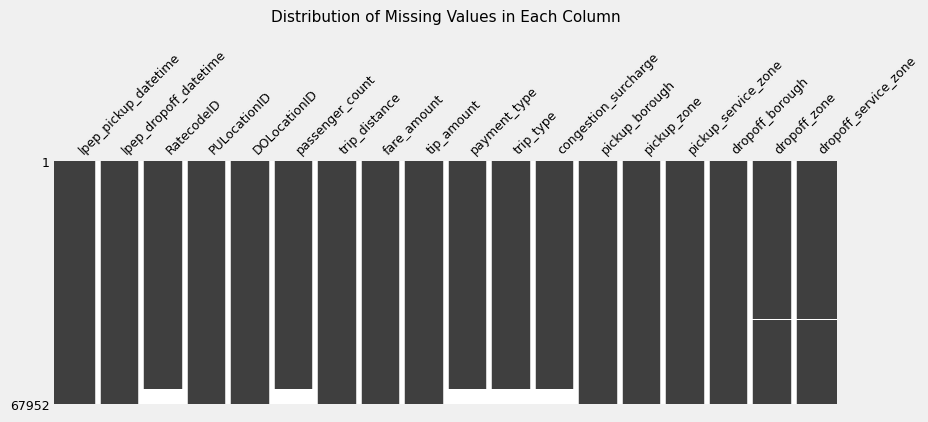

In [28]:
# mengidentifikasi distribusi sebaran missing values 
msno.matrix(df, sparkline=False, figsize=(9,3), fontsize=11)
plt.title('Distribution of Missing Values in Each Column\n', fontsize=11, loc='center')
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)
plt.show()

**`dropoff_service_zone`**

In [29]:
# mengidentifikasi missing values pada column dropoff_service_zone
location_nan = df.loc[(df['dropoff_service_zone'].isna())]
print(f'Jumlah missing value pada column dropoff_service_zone: {len(location_nan)}')
location_nan.head()

Jumlah missing value pada column dropoff_service_zone: 608


,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,congestion_surcharge,pickup_borough,pickup_zone,pickup_service_zone,dropoff_borough,dropoff_zone,dropoff_service_zone
31,2023-01-01 00:46:48,2023-01-01 01:08:17,4.0,95,265,1.0,10.44,47.1,9.92,1.0,1.0,0.0,Queens,Forest Hills,Boro Zone,Unknown,NaN,NaN
115,2023-01-01 01:52:58,2023-01-01 01:53:00,1.0,264,264,1.0,0.00,3.0,21.50,1.0,1.0,0.0,Unknown,NV,NaN,Unknown,NV,NaN
166,2023-01-01 02:37:12,2023-01-01 02:37:15,5.0,51,264,3.0,0.00,40.0,0.00,1.0,2.0,0.0,Bronx,Co-Op City,Boro Zone,Unknown,NV,NaN
173,2023-01-01 02:37:12,2023-01-01 02:37:15,5.0,260,264,1.0,0.00,20.0,4.20,1.0,2.0,0.0,Queens,Woodside,Boro Zone,Unknown,NV,NaN
186,2023-01-01 03:01:54,2023-01-01 03:01:56,5.0,129,264,1.0,0.00,12.0,0.00,1.0,2.0,0.0,Queens,Jackson Heights,Boro Zone,Unknown,NV,NaN


In [30]:
# menghapus lokasi di luar kawasan borough
print(f'Shape sebelum dibersihkan: {df.shape}')
df = df.loc[~((df['PULocationID'] >= 264) | (df['DOLocationID'] >= 264))].reset_index(drop=True)
print(f'Shape sesudah dibersihkan: {df.shape}')

Shape sebelum dibersihkan: (67952, 18)
Shape sesudah dibersihkan: (67300, 18)


In [31]:
# menghapus kawasan di luar borough
df = df.loc[~((df['dropoff_borough'] == 'EWR'))].reset_index(drop=True)

> - Penyebab banyaknya missing values pada column `dropoff_service_zone` karena lokasi penjemputan dan penurunan penumpang berada di luar kawasan borough, sehingga memiliki value "Unknown" yang menyebabkan missing value.
> - Kawasan ini merupakan kawasan di luar jangkauan analisis (kawasan borough yang akan dianalisis adalah Manhattan, Brooklyn, Queens, Bronx, dan Staten Island), oleh karena itu kawasan di luar borough akan dihapus karena tidak relevan. Sumber: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [32]:
# mengidentifikasi missing values yang tersisa
miss_val = df.loc[(df['RatecodeID'].isna()) & (df['passenger_count'].isna()) & (df['trip_type'].isna()) & (df['payment_type'].isna())]
print(f'Jumlah missing value yang masih ada: {len(miss_val)}')
miss_val.head()

Jumlah missing value yang masih ada: 4291


,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,congestion_surcharge,pickup_borough,pickup_zone,pickup_service_zone,dropoff_borough,dropoff_zone,dropoff_service_zone
62985,2023-01-01 00:28:00,2023-01-01 00:54:00,NaN,7,17,NaN,9.33,36.03,7.41,NaN,NaN,NaN,Queens,Astoria,Boro Zone,Brooklyn,Bedford,Boro Zone
62986,2023-01-01 00:39:00,2023-01-01 00:52:00,NaN,37,37,NaN,2.67,14.55,3.11,NaN,NaN,NaN,Brooklyn,Bushwick South,Boro Zone,Brooklyn,Bushwick South,Boro Zone
62987,2023-01-01 00:58:00,2023-01-01 01:21:00,NaN,80,7,NaN,7.39,32.13,6.63,NaN,NaN,NaN,Brooklyn,East Williamsburg,Boro Zone,Queens,Astoria,Boro Zone
62988,2023-01-01 00:35:00,2023-01-01 00:55:00,NaN,169,42,NaN,4.04,17.85,0.00,NaN,NaN,NaN,Bronx,Mount Hope,Boro Zone,Manhattan,Central Harlem North,Boro Zone
62989,2023-01-01 00:45:00,2023-01-01 00:55:00,NaN,42,262,NaN,3.86,19.67,4.68,NaN,NaN,NaN,Manhattan,Central Harlem North,Boro Zone,Manhattan,Yorkville East,Yellow Zone


> - Sebaran missing value yang tersisa sama-sama berada di rows terakhir, setelah dikaji melalui website resminya, ternyata pengumpulan datanya di-publish setiap bulan dengan adanya penundaan; *"Trip data will be published monthly (with two months delay) instead of bi-annually"*. 
> - Dapat diasumsikan penundaan tersebut berpengaruh terhadap keutuhan data sehingga dapat dianggap sebagai incomplete data. Dalam case ini, mungkin tidak ada tipe khusus dari missing values yang dapat dideteksi. Oleh karena itu, untuk mengatasinya dilakukan data imputation. 
> - Sumber: https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/#:~:text=Deleting%20the%20Missing%20value,-Generally%2C%20this%20approach&text=If%20the%20missing%20value%20is%20of%20type%20Missing%20At%20Random,and%20addressed%20through%20pairwise%20deletion. 

**`RatecodeID`**

In [33]:
# mengimputasi missing value column RatecodeID dengan mencocokan value lokasi penurunan penumpnag (dropoff_borough)
print("Sebelum 'RatecodeID' di-impute:")
error = df['RatecodeID'].value_counts()
print(error.sort_index().to_string(header=None))

mapping_dict = {}
for i in range(1, 6):
    ratecode = df[df['RatecodeID'] == i]['dropoff_zone'].unique()
    mapping_dict.update({zone: i for zone in ratecode})

df['RatecodeID'] = df['RatecodeID'].fillna(df['dropoff_zone'].map(mapping_dict))

print("\nSesudah 'RatecodeID' di-impute:")
error = df['RatecodeID'].value_counts()
print(error.sort_index().to_string(header=None))

miss_val_count = df['RatecodeID'].isnull().sum()
print(f'\nJumlah missing value column RatecodeID: {miss_val_count}')

Sebelum 'RatecodeID' di-impute:
1.0    61555
2.0    153  
3.0    17   
4.0    2    
5.0    1258 

Sesudah 'RatecodeID' di-impute:
1.0    61798
2.0    169  
3.0    24   
4.0    2    
5.0    5281 

Jumlah missing value column RatecodeID: 2


In [34]:
# memeriksa missing value yang tersisa
df[df['RatecodeID'].isna()]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,congestion_surcharge,pickup_borough,pickup_zone,pickup_service_zone,dropoff_borough,dropoff_zone,dropoff_service_zone
65207,2023-01-17 13:58:00,2023-01-17 14:09:00,NaN,185,58,NaN,2.57,19.47,1.50,NaN,NaN,NaN,Bronx,Pelham Parkway,Boro Zone,Bronx,Country Club,Boro Zone
66885,2023-01-28 20:20:00,2023-01-28 20:34:00,NaN,167,58,NaN,6.42,19.34,0.25,NaN,NaN,NaN,Bronx,Morrisania/Melrose,Boro Zone,Bronx,Country Club,Boro Zone


In [35]:
# mengimputasi missing value yang masih ada pada column RatecodeID
df['RatecodeID'] = df['RatecodeID'].fillna(df[df['dropoff_borough'] == 'Bronx']['RatecodeID'].mode().iloc[0])

miss_val_count = df['RatecodeID'].isnull().sum()
print(f'\nJumlah missing value column RatecodeID: {miss_val_count}')



Jumlah missing value column RatecodeID: 0


> - Langkah data imputation pada column `RatecodeID` dengan cara mengiterasi ID dari 1 hingga 5 kemudian dicocokan dengan unique value pada column `dropoff_zone` karena kedua column tersebut saling berkaitan. RatecodeID adalah ID akhir perjalanan, sedangkan dropoff_zone adalah nama wilayah lokasi akhir perjalanan.
> - Prosesnya adalah dengan menggunakan value yang sebelumnya sudah ada pada columnm `RatecodeID` kemudian dicocokan dengan value pada column `dropoff_zone`, kemudian value yang cocok tersebut di-impute pada missing value.
> - Missing value yang tersisa pada column `RatecodeID` nampaknya tidak memiliki value yang terisi sebelumnya pada column `dropoff_zone`, sehingga tidak bisa dicocokan dengan value lain. Oleh karena itu, untuk missing value yang tersisa akan di-impute dengan mode dari column `dropoff_borough` yang memiliki value "Bronx".

**`passenger_count`**

In [36]:
# mengimputasi missing value column passenger_count
print("Sebelum 'passenger_count' di-impute:")
error = df['passenger_count'].value_counts()
print(error.to_string(header=None))

df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].median())

print("\nSetelah 'passenger_count' di-impute:")
error = df['passenger_count'].value_counts()
print(error.to_string(header=None))

miss_val_count = df['passenger_count'].isnull().sum()
print(f'\nJumlah missing value column passenger_count: {miss_val_count}')

Sebelum 'passenger_count' di-impute:
1.0    53552
2.0    5010 
5.0    1758 
6.0    1049 
3.0    932  
4.0    357  
0.0    321  
7.0    3    
8.0    2    
9.0    1    

Setelah 'passenger_count' di-impute:
1.0    57843
2.0    5010 
5.0    1758 
6.0    1049 
3.0    932  
4.0    357  
0.0    321  
7.0    3    
8.0    2    
9.0    1    

Jumlah missing value column passenger_count: 0


> Missing values pada column `passenger_count` di-impute menggunakan mode/modus karena memiliki tipe category.

**`payment_type`**

In [37]:
# mengimputasi missing value column payment_type
print("Sebelum 'payment_type' di-impute:")
error = df['payment_type'].value_counts()
print(error.sort_index().to_string(header=None))

# mengimputasi missing value column payment_type yang memiliki value tip_amount bukan 0 akan di-impute dengan 1
df.loc[df['payment_type'].isna() & (df['tip_amount'] > 0), 'payment_type'] = 1

# sisanya akan di-impute dengan kategori 5 
df['payment_type'] = df['payment_type'].fillna(5)

print("\nSesudah 'payment_type' di-impute:")
error = df['payment_type'].value_counts()
print(error.sort_index().to_string(header=None))

miss_val_count = df['payment_type'].isnull().sum()
print(f'\nJumlah missing value column payment_type: {miss_val_count}')


Sebelum 'payment_type' di-impute:
1.0    40237
2.0    22359
3.0    326  
4.0    61   
5.0    2    

Sesudah 'payment_type' di-impute:
1.0    44039
2.0    22359
3.0    326  
4.0    61   
5.0    491  

Jumlah missing value column payment_type: 0


> - Missing value pada column `payment_type` yang memiliki value `tip_amount` > 0 di-impute dengan kategori 1 (credit card), karena berdasarkan data dictionary untuk column `tip_amount` akan secara otomatis diisi untuk pembayaran melalui credit card: *"automatically populated for credit card tips. Cash tips are not included"*. Sumber: https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf
> - Missing value yang lainnya pada column payment_type di-impute dengan kategori 5, yakni "Unknown" yang ada pada data disctionary.

**`trip_type`**

In [38]:
# mengimputasi missing value column trip_type
print("Sebelum 'trip_type' di-impute:")
error = df['trip_type'].value_counts()
print(error.sort_index().to_string(header=None))

# mengimputasi missing value column trip_type yang memiliki value trip_distance > 2 dan fare_amount > 35 dengan kategori 2 (dispatch)
df.loc[df['trip_type'].isna() & (df['trip_distance'] > 2) & (df['fare_amount'] > 35), 'trip_type'] = 2

# sisanya akan di-impute dengan kategori 1 (street-hail)
df['trip_type'] = df['trip_type'].fillna(1)

print("\nSesudah 'trip_type' di-impute:")
error = df['trip_type'].value_counts()
print(error.sort_index().to_string(header=None))

miss_val_count = df['trip_type'].isnull().sum()
print(f'\nJumlah missing value column payment_type: {miss_val_count}')

Sebelum 'trip_type' di-impute:
1.0    61842
2.0    1134 

Sesudah 'trip_type' di-impute:
1.0    65469
2.0    1807 

Jumlah missing value column payment_type: 0


> - Missing value pada column `trip_type` yang memiliki kondisi column `trip_distance` > 2 miles dan column `fare_amount` > 35 dollar akan di-impute dengan kategori 2 (dispatch), karena berdasarkan website resminya untuk tipe perjalanan dispatch memiliki tarif yang berbeda dibandingkan layanan lainnya. Sehingga, perbedaan itu lah yang menjadi kondisi untuk memfilter missing value pada column `trip_type`. Sumber: https://www.nyc.gov/site/tlc/about/accessible-dispatch.page
> - Kemudian untuk missing values yang masih tersisa akan di-impute dengan kategori 1 (street-hail).

**`congestion_surcharge`**

In [39]:
# melihat jumlah value tiap kategori congestion surcharge
df['congestion_surcharge'].value_counts()

congestion_surcharge
0.00    46113
2.75    16856
2.50    16   
Name: count, dtype: int64

In [40]:
# memfilter column congestion_surcharge yang memiliki value lokasi Manhattan pada column pickup_borough dan dropoff_borough
congestion_surcharge_zone = df['congestion_surcharge'][(df['pickup_borough'] == 'Manhattan') | (df['dropoff_borough'] == 'Manhattan')]
congestion_surcharge_zone.value_counts()

congestion_surcharge
0.00    22798
2.75    16835
2.50    16   
Name: count, dtype: int64

In [41]:
# mengimputasi missing value column congestion_surcharge dengan kondisi memiliki value lokasi Manhattan pada column pickup_borough dan dropoff_borough
filtered_values = ((df['pickup_borough'] == 'Manhattan') | (df['dropoff_borough'] == 'Manhattan')) & (df['congestion_surcharge'].isna())
df.loc[filtered_values, 'congestion_surcharge'] = 2.75

In [42]:
# mengimputasi missing value column congestion_surcharge yang tidak memiliki value lokasi Manhattan pada column pickup_borough dan dropoff_borough
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)


> - Berdasarkan webiste resmi NYC TLC, congestion surcharge dikenakan untuk perjalanan yang dimulai, diakhiri, atau melewati Zona Kemacetan, yakni Manhattan: *"trips in taxis and For-Hire Vehicles will be charged a surcharge for trips that start, end or pass through Congestion Zone. The Congestion Zone is Manhattan"*. Oleh karena itu, untuk mengisi missing value pada column `congestion_surcharge` yang memiliki value "Mahattan" pada column `pickup_borough` dan `dropoff_borough` akan di-impute dengan value 2.75 dollar karena termasuk non-shared trips dan dianggap sebagai taxicabs. Sisanya akan dibiarkan memiliki value 0 dengan anggapan tidak melewati zona congestion surcharge.
> - Sumber: https://www.nyc.gov/site/tlc/about/congestion-surcharge.page

In [43]:
# memeriksa proporsi missing value secara keseluruhan
total_missing = ((df.isna().sum().sum()/(df.size)) * 100)
print(f'\nProporsi missing values secara keseluruhan: {total_missing}')


Proporsi missing values secara keseluruhan: 0.0


**Handling Data Type Error**

In [44]:
# mengubah tipe data yang salah
df = df.astype({'RatecodeID': 'category',
                'passenger_count': 'int',
                'payment_type': 'category',
                'trip_type': 'category',
                'PULocationID': 'category',
                'DOLocationID': 'category'})

df.dtypes

lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
RatecodeID               category      
PULocationID             category      
DOLocationID             category      
passenger_count          int32         
trip_distance            float64       
fare_amount              float64       
tip_amount               float64       
payment_type             category      
trip_type                category      
congestion_surcharge     float64       
pickup_borough           object        
pickup_zone              object        
pickup_service_zone      object        
dropoff_borough          object        
dropoff_zone             object        
dropoff_service_zone     object        
dtype: object

**Handling Violation Data** <br/>
Data yang tidak sesuai aturan NYC TLC

In [45]:
# mengidentifikasi column passenger_count yang melebihi maksimum penumpang (6 penumpang)
passenger_error = df[df['passenger_count'] > 6]
print(f'Jumlah penumpang yang menyalahi aturan: {len(passenger_error)}')
passenger_error.head()

Jumlah penumpang yang menyalahi aturan: 6


,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,congestion_surcharge,pickup_borough,pickup_zone,pickup_service_zone,dropoff_borough,dropoff_zone,dropoff_service_zone
26203,2023-01-14 03:09:48,2023-01-14 03:09:50,5.0,95,95,8,0.12,8.9,5.0,1.0,2.0,0.0,Queens,Forest Hills,Boro Zone,Queens,Forest Hills,Boro Zone
26410,2023-01-14 10:41:55,2023-01-14 11:03:50,5.0,121,95,7,6.38,27.5,4.0,1.0,2.0,0.0,Queens,Hillcrest/Pomonok,Boro Zone,Queens,Forest Hills,Boro Zone
27665,2023-01-14 19:12:25,2023-01-14 19:12:28,5.0,130,130,7,0.00,75.0,0.0,1.0,2.0,0.0,Queens,Jamaica,Boro Zone,Queens,Jamaica,Boro Zone
29369,2023-01-15 19:21:14,2023-01-15 19:21:17,5.0,75,75,8,0.00,8.0,1.0,1.0,2.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem South,Boro Zone
43506,2023-01-22 20:11:06,2023-01-22 20:40:23,5.0,130,52,7,15.13,70.0,14.2,1.0,2.0,0.0,Queens,Jamaica,Boro Zone,Brooklyn,Cobble Hill,Boro Zone


In [46]:
# mengganti jumlah penumpang yang lebih dari jumlah maksimum dengan nilai 6 
df.loc[df['passenger_count'] > 6, 'passenger_count'] = 6

> - Berdasarkan aturan yang tertera, maksimal penumpang hanya boleh berjumlah 5 orang dewasa. Boleh > 5 dalam catatan penumpang tambahan harus berusia < 7 tahun dan dipangku oleh orang dewasa. Dalam case ini saya menentukan 6 sebagai batasan penumpang yang menyalahi aturan, diasumsikan tumpangan tambahannya adalah anak berusia < 7 tahun.
> - Total kendaraan yang melebihi jumlah maksimum penumpang berjumlah 6. Dapat diasumsikan hal ini merupakan kesalahan dari pihak driver, karena berdasarkan keterangan data dictionary pihak driver lah yang memasukan nilai jumlah penumpnag.
> - Sehingga value yang melebihi 6 akan di replace dengan jumlah maksimum penumpang, yakni 6.
> - Sumber: https://www.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page

**Create New Columns**

In [47]:

# membuat column baru
pickup_hour = df['lpep_pickup_datetime'].dt.hour
dropoff_hour = df['lpep_dropoff_datetime'].dt.hour
date = df['lpep_pickup_datetime'].dt.normalize()
df['weekday'] = date.dt.day_name()
df['trip_duration_minute'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60
df['speed'] = (df['trip_distance']/(df['trip_duration_minute']/60)).round(2)

def day_time(pickup_hour):
    if pickup_hour < 6:
        return 'Early Morning'
    elif pickup_hour < 12:
        return 'Morning'
    elif pickup_hour < 17:
        return 'Afternoon'   
    elif pickup_hour < 22:
        return 'Evening'
    elif pickup_hour == 0:
        return 'Midnight'
    else:
        return 'Night'

df['pickup_day_time'] = pickup_hour.apply(day_time)
df['dropoff_day_time'] = dropoff_hour.apply(day_time)
df.head(3)

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,congestion_surcharge,pickup_borough,pickup_zone,pickup_service_zone,dropoff_borough,dropoff_zone,dropoff_service_zone,weekday,trip_duration_minute,speed,pickup_day_time,dropoff_day_time
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,166,143,1,2.58,14.9,4.03,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone,Sunday,11.016667,14.05,Early Morning,Early Morning
1,2023-01-01 00:51:03,2023-01-01 00:57:49,1.0,24,43,1,1.81,10.7,2.64,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone,Sunday,6.766667,16.05,Early Morning,Early Morning
2,2023-01-01 00:35:12,2023-01-01 00:41:32,1.0,223,179,1,0.00,7.2,1.94,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone,Sunday,6.333333,0.00,Early Morning,Early Morning


> Keterangan column baru:
> - `pickup_hour`: Jam ketika penumpang dijemput.
> - `trip_duration_minute`: Durasi perjalanan dalam menit.
> - `weekday`: Hari perjalanan.
> - `speed`: Kecepatan berkendara (mph: miles per hour)
> - `pickup_day_time`: Perbedaan waktu penjemputan penumpang

**Handling Zero Values**

In [48]:
# informasi mengenai statistika deskriptif dataset 
df_num = df.select_dtypes('number')
df_num.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,congestion_surcharge,trip_duration_minute,speed
count,67276.000000,67276.000000,67276.000000,67276.000000,67276.000000,67276.000000,67276.000000
mean,1.296257,8.164704,16.429077,2.134784,0.794251,17.907280,41.400776
std,0.951209,589.156837,12.560470,2.964065,1.246286,73.568166,3629.999301
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.016667,0.000000
25%,1.000000,1.130000,9.300000,0.000000,0.000000,7.283333,8.210000
50%,1.000000,1.860000,13.500000,1.620000,0.000000,11.416667,10.420000
75%,1.000000,3.210000,19.800000,3.340000,2.750000,17.433333,13.472500
max,6.000000,120098.840000,490.000000,222.220000,2.750000,1439.883333,867842.400000


In [49]:
colls = ['trip_distance', 'trip_duration_minute', 'passenger_count', 'speed']
condition = (df[colls] == 0)
zero_val = df[condition.any(axis=1)]
total_zero_count = len(zero_val)
print(f'Jumlah baris dengan zero values secara keseluruhan: {total_zero_count}')
total_entries = len(df)
zero_percentage = (total_zero_count / total_entries) * 100
print(f'Proporsi zero values secara keseluruhan: {zero_percentage}')

Jumlah baris dengan zero values secara keseluruhan: 3206
Proporsi zero values secara keseluruhan: 4.7654438432724895


> Terdapat zero values pada columns `passenger_count`, `trip_distance`, `trip_duration_minute` dan `speed` yang mana dalam case ini columns tersebut terbilang tidak wajar jika memiliki values 0. 

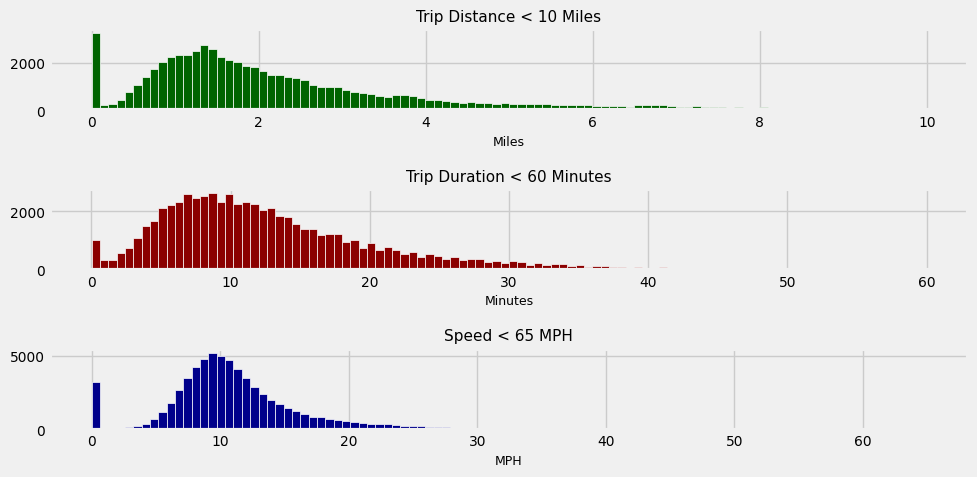

In [50]:
fig, axs = plt.subplots(3, 1, figsize=(10, 5))

# memvisualisasikan sebaran trip_distance dengan memfilter < 10 miles untuk melihat frequency zero values
filtered_distance = df[df['trip_distance'] < 10]
axs[0].hist(filtered_distance['trip_distance'], bins=100, color='darkgreen', edgecolor='white')
axs[0].set_title('Trip Distance < 10 Miles', fontsize=11)
axs[0].set_xlabel('Miles', fontsize=9)
axs[0].set_ylabel('', fontsize=11)
axs[0].tick_params(axis='both', labelsize=10)

# memvisualisasikan sebaran trip_duration_minute dengan memfilter < 60 menit untuk melihat frequency zero values
filtered_duration = df[df['trip_duration_minute'] < 60]
axs[1].hist(filtered_duration['trip_duration_minute'], bins=100, color='darkred', edgecolor='white')
axs[1].set_title('Trip Duration < 60 Minutes', fontsize=11)
axs[1].set_xlabel('Minutes', fontsize=9)
axs[1].set_ylabel('', fontsize=11)
axs[1].tick_params(axis='both', labelsize=10)

# memvisualisasikan sebaran speed dengan memfilter < 65 mph untuk melihat frequency zero values
filtered_speed = df[df['speed'] < 65]
axs[2].hist(filtered_speed['speed'], bins=100, color='darkblue', edgecolor='white')
axs[2].set_title('Speed < 65 MPH', fontsize=11)
axs[2].set_xlabel('MPH', fontsize=9)
axs[2].set_ylabel('', fontsize=11)
axs[2].tick_params(axis='both', labelsize=10)
plt.tight_layout()
plt.show()

In [51]:
# menghapus zero values pada column trip_distance, fare_amount, trip_duration_minute, dan passenger_count
colls = ['trip_distance', 'trip_duration_minute', 'passenger_count', 'speed']
df = df[(df[colls] != 0).all(axis=1)].reset_index(drop=True)

> - Zero values pada columns `trip_distance`, `speed`, dan `trip_duration_minute` lebih baik dihapus karena real zero yang bukan dari hasil kesalahan data ditakutkan akan memperngaruhi sebaran data dan central tendency measure, sehingga perlu dihapus. Proporsi yang relatif kecil juga dipertimbangkan dalam menghapus zero values dan dianggap tidak akan mempengaruhi informasi secara signifikan atau mempengaruhi kesimpulan yang dapat diambil dari data.
> - Zero values pada column `passenger_count` dihapus karena diasumsikan passenger dengan jumlah 0 merupakan layanan TLC Food Delivery dan hal tersebut tidak relevan dengan hal yang ingin dianalisis. Sumber: https://www.nyc.gov/site/tlc/drivers/tlc-driver-food-delivery.page

**Handling Outliers**

In [52]:
# informasi mengenai statistika deskriptif dataset 
df_num = df.select_dtypes('number')
df_num.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,congestion_surcharge,trip_duration_minute,speed
count,64070.000000,64070.000000,64070.000000,64070.000000,64070.000000,64070.000000,64070.000000
mean,1.310286,8.561813,16.264777,2.190277,0.820044,17.812852,43.373646
std,0.961961,603.714766,11.591092,2.964043,1.257982,73.452909,3719.688399
min,1.000000,0.010000,0.000000,0.000000,0.000000,0.033333,0.010000
25%,1.000000,1.220000,9.300000,0.000000,0.000000,7.400000,8.520000
50%,1.000000,1.930000,12.915000,1.820000,0.000000,11.416667,10.620000
75%,1.000000,3.310000,19.107500,3.410000,2.750000,17.233333,13.690000
max,6.000000,120098.840000,455.000000,222.220000,2.750000,1438.933333,867842.400000


> Columns `trip_distance`, `fare_amount`, `trip_duration_minute`, dan `speed` terindikasi memiliki extreme outlier.

**`trip_distance`**

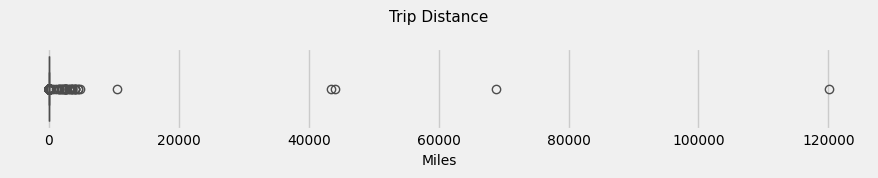

In [53]:
# mengidentifikasi outlier column trip_distance 
fig, ax = plt.subplots(figsize=(9, 2))
boxplot = sns.boxplot(x=df['trip_distance'], color='gray')
boxplot.set_title('Trip Distance\n', fontsize=11)
ax.tick_params(axis='both', labelsize=10)
ax.set_xlabel('Miles', fontsize=10)
plt.tight_layout()
plt.show()

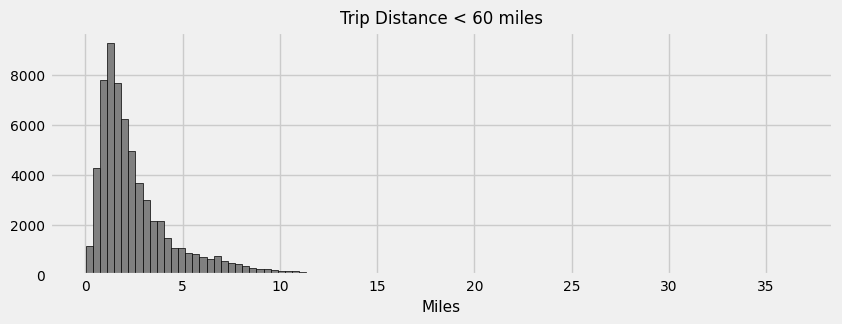

In [54]:
# melihat sebaran data trip_distance di bawah 60 miles untuk menentukan batasan maksimum yang wajar
filtered_distance = df[df['trip_distance'] < 60]
plt.figure(figsize=(9, 3))
plt.hist(filtered_distance['trip_distance'], bins=100, color='grey', edgecolor='black')
plt.title('Trip Distance < 60 miles', fontsize=12)
plt.xlabel('Miles', fontsize=11)
plt.ylabel('', fontsize=11)
plt.tick_params(axis='both', labelsize=10)
plt.show()

In [55]:
# mengidentifikasi jarak tempuh yang melebihi 60 miles
error_trip_distance = df[(df['trip_distance'] > 60)]
print(f'Jumlah trip_distance error: {len(error_trip_distance)}')
error_trip_distance.head()

Jumlah trip_distance error: 38


,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,congestion_surcharge,pickup_borough,pickup_zone,pickup_service_zone,dropoff_borough,dropoff_zone,dropoff_service_zone,weekday,trip_duration_minute,speed,pickup_day_time,dropoff_day_time
6853,2023-01-05 09:00:03,2023-01-05 15:18:38,5.0,134,134,1,66.18,15.00,0.00,2.0,1.0,2.75,Queens,Kew Gardens,Boro Zone,Queens,Kew Gardens,Boro Zone,Thursday,378.583333,10.49,Morning,Afternoon
31190,2023-01-17 18:40:38,2023-01-17 19:04:45,5.0,82,236,1,1571.97,29.97,3.04,1.0,1.0,2.75,Queens,Elmhurst,Boro Zone,Manhattan,Upper East Side North,Yellow Zone,Tuesday,24.116667,3910.91,Evening,Evening
60029,2023-01-01 12:35:00,2023-01-01 12:58:00,5.0,181,137,1,579.63,28.49,4.84,1.0,1.0,2.75,Brooklyn,Park Slope,Boro Zone,Manhattan,Kips Bay,Yellow Zone,Sunday,23.000000,1512.08,Afternoon,Afternoon
60457,2023-01-05 08:39:00,2023-01-05 08:58:00,5.0,193,140,1,2555.47,23.68,0.49,1.0,1.0,2.75,Queens,Queensbridge/Ravenswood,Boro Zone,Manhattan,Lenox Hill East,Yellow Zone,Thursday,19.000000,8069.91,Morning,Morning
60564,2023-01-05 17:21:00,2023-01-05 17:26:00,5.0,49,65,1,3077.89,12.02,4.00,1.0,1.0,0.00,Brooklyn,Clinton Hill,Boro Zone,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,Thursday,5.000000,36934.68,Evening,Evening


In [56]:
# menghapus jarak tempuh yang melebihi 60 miles
df = df.loc[~((df['trip_distance'] > 60))].reset_index(drop=True)

> Dalam case ini 60 miles ditentukan sebagai nilai maksimum untuk jarak tempuh berkendara dalam sehari dan tidak mengantarkan penumpang di luar state. Setelah diidentifiaksi, column `trip_distance` yang memiliki value lebih dari 60 miles memiliki value kecepatan berkendara yang tidak wajar. Sehingga, jarak tempuh yang melebihi 60 miles dihapus.

**`trip_duration_minute`**

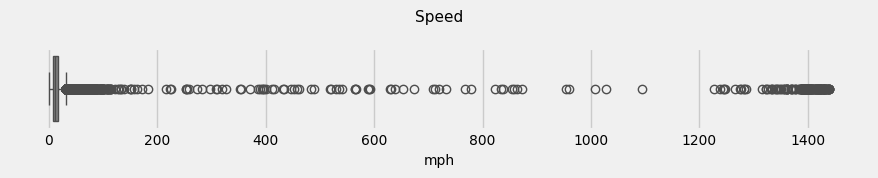

In [57]:
# mengidentifikasi outlier column trip_duration_minute 
fig, ax = plt.subplots(figsize=(9, 2))
boxplot = sns.boxplot(x=df['trip_duration_minute'], color='gray')
boxplot.set_title('Speed\n', fontsize=11)
ax.tick_params(axis='both', labelsize=10)
ax.set_xlabel('mph', fontsize=10)
plt.tight_layout()
plt.show()

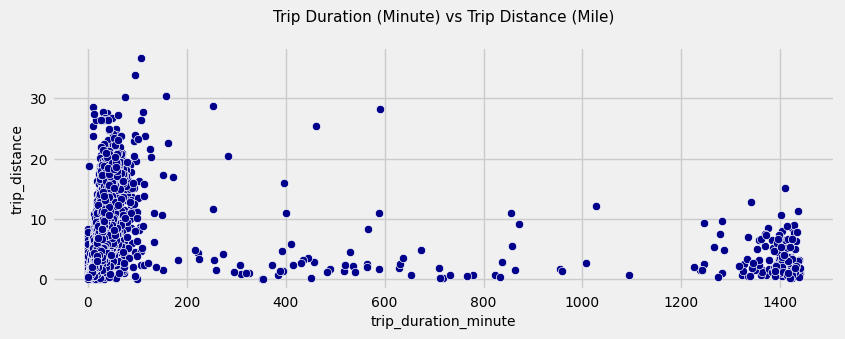

In [58]:
# mengidentifikasi outlier column trip_duration_minute dengan melihat hubungannya dengan column trip_distance 
plt.figure(figsize=(9, 3))
sns.scatterplot(data=df, x='trip_duration_minute', y='trip_distance', color='darkblue')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Trip Duration (Minute) vs Trip Distance (Mile)\n', fontsize=11)
plt.xlabel('trip_duration_minute', fontsize=10)
plt.ylabel('trip_distance', fontsize=10)
plt.show()

In [59]:
# mengidentifikasi value trip_duration_minute yang melebihi 200 menit 
error_trip_duration_minute = df[(df['trip_duration_minute'] > 200)] 
print(f'Jumlah trip_duration_minute error: {len(error_trip_duration_minute)}')
error_trip_duration_minute.head()

Jumlah trip_duration_minute error: 235


,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,congestion_surcharge,pickup_borough,pickup_zone,pickup_service_zone,dropoff_borough,dropoff_zone,dropoff_service_zone,weekday,trip_duration_minute,speed,pickup_day_time,dropoff_day_time
47,2023-01-01 00:23:04,2023-01-01 23:18:32,1.0,255,48,1,8.55,47.8,5.30,1.0,1.0,2.75,Brooklyn,Williamsburg (North Side),Boro Zone,Manhattan,Clinton East,Yellow Zone,Sunday,1375.466667,0.37,Early Morning,Night
103,2023-01-01 01:53:59,2023-01-02 00:00:00,1.0,260,223,1,2.64,14.9,0.00,1.0,1.0,0.00,Queens,Woodside,Boro Zone,Queens,Steinway,Boro Zone,Sunday,1326.016667,0.12,Early Morning,Early Morning
112,2023-01-01 01:25:46,2023-01-02 00:29:15,1.0,129,37,1,6.53,31.0,0.00,2.0,1.0,0.00,Queens,Jackson Heights,Boro Zone,Brooklyn,Bushwick South,Boro Zone,Sunday,1383.483333,0.28,Early Morning,Early Morning
195,2023-01-01 03:12:42,2023-01-02 02:03:43,5.0,129,129,1,0.72,20.0,6.09,1.0,2.0,0.00,Queens,Jackson Heights,Boro Zone,Queens,Jackson Heights,Boro Zone,Sunday,1371.016667,0.03,Early Morning,Early Morning
240,2023-01-01 04:03:36,2023-01-02 03:31:50,1.0,65,37,5,3.61,20.5,0.00,2.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,Brooklyn,Bushwick South,Boro Zone,Sunday,1408.233333,0.15,Early Morning,Early Morning


In [60]:
# menghapus value trip_duration_minute yang lebih dari 200 menit 
df = df.loc[~((df['trip_duration_minute'] > 200))].reset_index(drop=True)

> Berdasarkan hubungannya dengan column `trip_distance` melalui scatterplot, dapat dilihat terdapat kejanggalan pada durasi perjalanan di atas 200 menit, yakni berkendara dengan durasi panjang namun memiliki jarak perjalanan yang sangat pendek, serta pada column `speed` memiliki value kecepatan yang sangat tidak masuk akal, yakni kurang dari 1 mph. Sehingga value pada column `trip_duration_minute` yang memiliki value lebih dari 200 menit dihapus.

**`speed`**

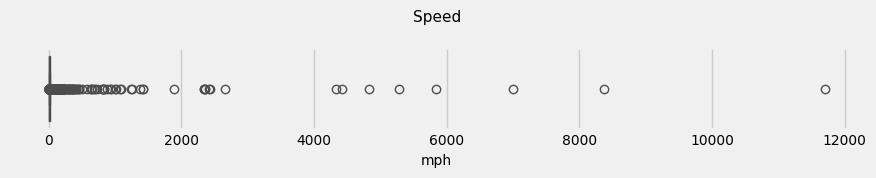

In [61]:
# mengidentifikasi outlier column speed 
fig, ax = plt.subplots(figsize=(9, 2))
boxplot = sns.boxplot(x=df['speed'], color='gray')
boxplot.set_title('Speed\n', fontsize=11)
ax.tick_params(axis='both', labelsize=10)
ax.set_xlabel('mph', fontsize=10)
plt.tight_layout()
plt.show()

In [62]:
# mengidentifikasi speed yang tidak sesuai dengan waktu tempuh dan aturan speed limits NYC TLC
error_speed_time = df[df['speed'] > 65]
print(f'Jumlah speed error: {len(error_speed_time)}')
error_speed_time.head()

Jumlah speed error: 133


,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,congestion_surcharge,pickup_borough,pickup_zone,pickup_service_zone,dropoff_borough,dropoff_zone,dropoff_service_zone,weekday,trip_duration_minute,speed,pickup_day_time,dropoff_day_time
33,2023-01-01 00:41:53,2023-01-01 00:41:58,1.0,83,83,1,6.70,3.0,0.00,3.0,1.0,0.0,Queens,Elmhurst/Maspeth,Boro Zone,Queens,Elmhurst/Maspeth,Boro Zone,Sunday,0.083333,4824.00,Early Morning,Early Morning
154,2023-01-01 01:59:48,2023-01-01 01:59:51,5.0,36,36,2,0.09,100.0,20.06,1.0,2.0,0.0,Brooklyn,Bushwick North,Boro Zone,Brooklyn,Bushwick North,Boro Zone,Sunday,0.050000,108.00,Early Morning,Early Morning
180,2023-01-01 03:00:27,2023-01-01 03:00:54,3.0,251,251,1,4.90,23.0,0.00,2.0,1.0,0.0,Staten Island,Westerleigh,Boro Zone,Staten Island,Westerleigh,Boro Zone,Sunday,0.450000,653.33,Early Morning,Early Morning
183,2023-01-01 03:06:11,2023-01-01 03:06:41,5.0,101,101,1,1.30,90.0,0.00,3.0,2.0,0.0,Queens,Glen Oaks,Boro Zone,Queens,Glen Oaks,Boro Zone,Sunday,0.500000,156.00,Early Morning,Early Morning
184,2023-01-01 03:07:26,2023-01-01 03:07:50,5.0,101,101,1,1.30,60.0,0.00,1.0,2.0,0.0,Queens,Glen Oaks,Boro Zone,Queens,Glen Oaks,Boro Zone,Sunday,0.400000,195.00,Early Morning,Early Morning


In [63]:
# menghapus speed yang tidak sesuai dengan waktu tempuh dan aturan speed limits NYC TLC
df = df.drop(df[(df['speed'] > 65)].index)

> - Speed limit yang berlaku di NYC TLC adalah 55 mph untuk di jalan raya dengan pengecualian kecepatan tersebut bisa berbeda jika ada tanda atau papan penunjuk.: *"The speed limit on New York State highways is 55 mph or unless otherwise posted."*. Namun, dalam case ini akan mengikuti hukum yang berlaku di seluruh NYC dengan speed limit 65 mph.
> - Sumber: https://www.nyc.gov/assets/tlc/downloads/pdf/driver_education_study_guide.pdf dan https://spectrumlocalnews.com/nys/central-ny/ny-state-of-politics/2023/03/07/a-70-mph-speed-limit-in-new-york--

**`fare_amount`**

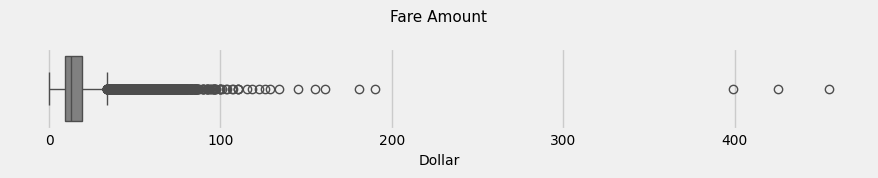

In [64]:
# mengidentifikasi outlier column fare_amount 
fig, ax = plt.subplots(figsize=(9, 2))
boxplot = sns.boxplot(x=df['fare_amount'], color='gray')
boxplot.set_title('Fare Amount\n', fontsize=11)
ax.tick_params(axis='both', labelsize=10)
ax.set_xlabel('Dollar', fontsize=10)
plt.tight_layout()
plt.show()

In [65]:
# mengidentifikasi fare_amount yang melebihi 300 dollar 
error_fare_amount = df[df['fare_amount'] > 300]
print(f'Jumlah speed error: {len(error_fare_amount)}')
error_fare_amount.head()

Jumlah speed error: 3


,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,congestion_surcharge,pickup_borough,pickup_zone,pickup_service_zone,dropoff_borough,dropoff_zone,dropoff_service_zone,weekday,trip_duration_minute,speed,pickup_day_time,dropoff_day_time
47145,2023-01-25 17:14:16,2023-01-25 17:21:43,5.0,80,37,1,0.60,425.0,0.0,2.0,2.0,0.0,Brooklyn,East Williamsburg,Boro Zone,Brooklyn,Bushwick South,Boro Zone,Wednesday,7.450000,4.83,Evening,Evening
55512,2023-01-29 20:01:58,2023-01-29 20:05:25,5.0,92,92,1,0.07,455.0,0.0,2.0,2.0,0.0,Queens,Flushing,Boro Zone,Queens,Flushing,Boro Zone,Sunday,3.450000,1.22,Evening,Evening
57587,2023-01-30 22:13:19,2023-01-30 22:13:32,5.0,82,82,1,0.02,399.0,0.0,2.0,2.0,0.0,Queens,Elmhurst,Boro Zone,Queens,Elmhurst,Boro Zone,Monday,0.216667,5.54,Night,Night


In [66]:
# menghapus value fare_amount yang melebihi 300 dollar 
df = df.drop(df[(df['fare_amount'] > 300)].index)

> Column `fare_amount` dengan value lebih dari 300 dollar setelah dikaji memiliki value yang tidak wajar setelah memandingkannya dengan columns `trip_distance` yang hanya menempuh jarak kurang dari 1 miles, sehingga dihapus.

**Checking Overall Data**

In [67]:
# informasi mengenai statistika deskriptif dataset 
df_num = df.select_dtypes('number')
df_num.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,congestion_surcharge,trip_duration_minute,speed
count,63661.00000,63661.000000,63661.000000,63661.000000,63661.000000,63661.000000,63661.000000
mean,1.31107,2.760717,16.204192,2.194582,0.821728,13.667558,11.849731
std,0.96351,2.587246,10.880762,2.963265,1.258723,9.635519,5.297153
min,1.00000,0.010000,0.000000,0.000000,0.000000,0.033333,0.020000
25%,1.00000,1.220000,9.300000,0.000000,0.000000,7.416667,8.540000
50%,1.00000,1.930000,12.870000,1.850000,0.000000,11.400000,10.620000
75%,1.00000,3.300000,19.100000,3.410000,2.750000,17.150000,13.670000
max,6.00000,36.610000,190.000000,222.220000,2.750000,182.533333,64.920000


> - Setelah melalui proses data cleaning, data yang awalnya berjumlah 68211 menjadi 63681. Teradpat 4530 jumlah data yang dibersihkan.
> - Proses data clening meliputi:
>   - Handling Duplicated Rows
>   - Handling Negative Values
>   - Handling Value Error
>   - Dropping Unrelevant Columns
>   - Handling Missing Values
>   - Handling Data Type Error
>   - Handling Violation Data (Data yang tidak sesuai aturan NYC TLC)
>   - Create New Columns
>   - Handling Zero Values
>   - Handling Outliers

**Save Data to CSV File**

In [68]:
# df.to_csv('nyc_tlc_cleaned_data.csv', index=False)

# **Data Analysing**

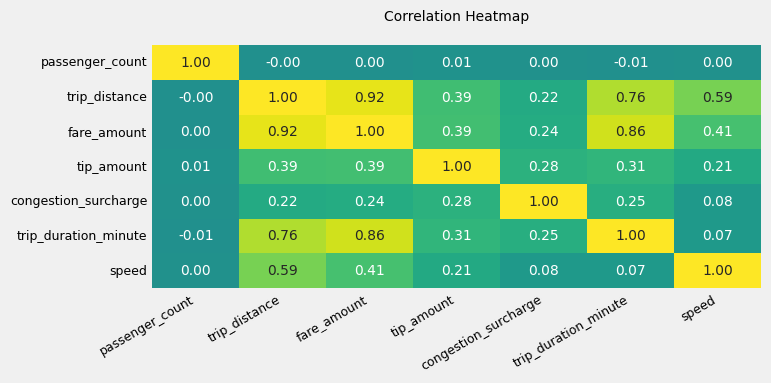

In [69]:
# melihat korelasi antar columns
plt.figure(figsize = (7, 3))
heatmap = sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='viridis', 
                      center=0, annot_kws={'size': 10}, cbar=False)
heatmap.set_title('Correlation Heatmap\n', fontdict={'fontsize':10})
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=30, ha='right')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

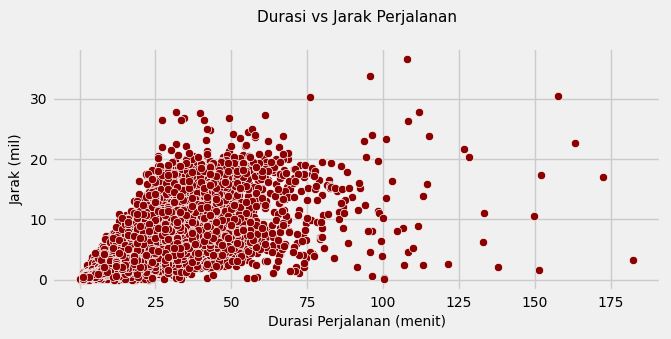

In [70]:
# mengidentifikasi pola hubungan antara trip_duration_minute dan trip_distance
plt.figure(figsize = (7, 3))
sns.scatterplot(df, x='trip_duration_minute', y='trip_distance', color='darkred')
plt.title('Durasi vs Jarak Perjalanan\n', fontsize=11)
plt.xlabel('Durasi Perjalanan (menit)', fontsize=10)
plt.ylabel('Jarak (mil)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

> **Insights**: <br/>
> - Terlihat adanya hubungan linear yang positif antara columns `trip_duration_minute` vs `trip_distance` dengan nilai korelasi 0.76. Hal ini memberikan insight tentang hubungan antara durasi perjalanan dan jarak tempuh. Korelasi yang relatif tinggi menunjukkan adanya keterkaitan antara dua variabel tersebut, meskipun tidak mengindikasikan sebab-akibat.

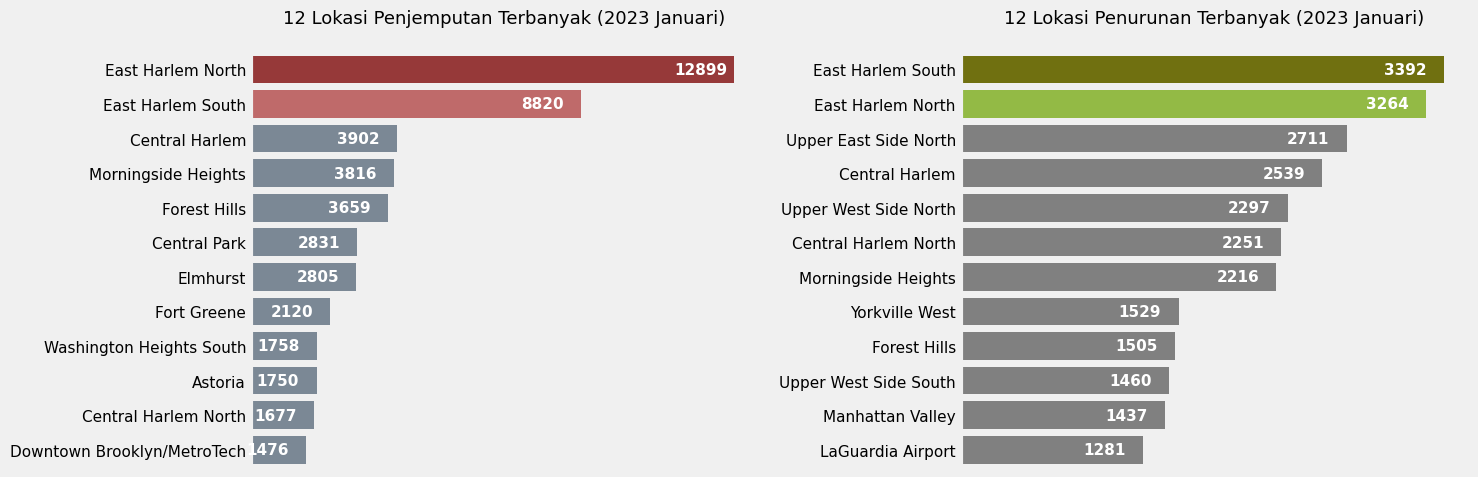

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# mengidentifikasi pickup zone dengan pemesanan terbanyak
busiest_pickup_zone = df.explode('passenger_count').groupby('pickup_zone')['passenger_count'].count().nlargest(12).reset_index()
def custome_palette(series, max_color='brown', second_max_color='indianred', other_color='lightslategrey'):
    max_val = series.max()
    second_max_val = series.nlargest(2).iloc[-1]  
    pal = []
    for item in series:
        if item == max_val:
            pal.append(max_color)
        elif item == second_max_val:
            pal.append(second_max_color)
        else:
            pal.append(other_color)
    return pal

palette_pickup = custome_palette(busiest_pickup_zone['passenger_count'])
sns.barplot(ax=axes[0], data=busiest_pickup_zone, x='passenger_count', y='pickup_zone', palette=palette_pickup, orient='h', hue='pickup_zone')

for i in axes[0].containers:
    axes[0].bar_label(i, padding=-43, color='white', fontsize=11, label_type='edge', fontweight='bold')

axes[0].set_ylabel('')
axes[0].set_title('12 Lokasi Penjemputan Terbanyak (2023 Januari)\n', size=13)
axes[0].tick_params(axis='both', labelsize=11)  
axes[0].spines[['right', 'top', 'bottom']].set_visible(False) 
axes[0].xaxis.set_visible(False)

# mengidentifikasi lokasi tujuan terbanyak
busiest_dropoff_zone = df.explode('passenger_count').groupby('dropoff_zone')['passenger_count'].count().nlargest(12).reset_index()
def custome_palette(series, max_color='olive', second_max_color='yellowgreen', other_color='grey'):
    max_val = series.max()
    second_max_val = series.nlargest(2).iloc[-1]  
    pal = []
    for item in series:
        if item == max_val:
            pal.append(max_color)
        elif item == second_max_val:
            pal.append(second_max_color)
        else:
            pal.append(other_color)
    return pal

palette_dropoff = custome_palette(busiest_dropoff_zone['passenger_count'])
sns.barplot(ax=axes[1], data=busiest_dropoff_zone, x='passenger_count', y='dropoff_zone', palette=palette_dropoff, orient='h', hue='dropoff_zone')

for i in axes[1].containers:
    axes[1].bar_label(i, padding=-43, color='white', fontsize=11, label_type='edge', fontweight='bold')

axes[1].set_ylabel('')
axes[1].set_title('12 Lokasi Penurunan Terbanyak (2023 Januari)\n', size=13)
axes[1].tick_params(axis='both', labelsize=11)
axes[1].spines[['right', 'top', 'bottom']].set_visible(False) 
axes[1].xaxis.set_visible(False)

plt.tight_layout()
plt.show()

> **Disclaimer**:
> - Dalam mengidentifikasi lokasi dengan pemesanan terbanyak dilakukan dengan menghitung satu pemesan yang mewakiliki total penumpnag dalam satu order, sehingga informasi jumlah pemesanan tidak bias oleh satu order yang diisi dengan banyak penumpnag.
>
> **Insights**:
> - Lokasi penjemputan dan penurunan terpopuler dapat membantu dalam merencanakan penempatan/distribusi armada dan membantu dalam mengoptimalkan rute pengemudi. Hal ini dapat meningkatkan efisiensi penggunaan armada dan mengurangi waktu perjalanan kosong.

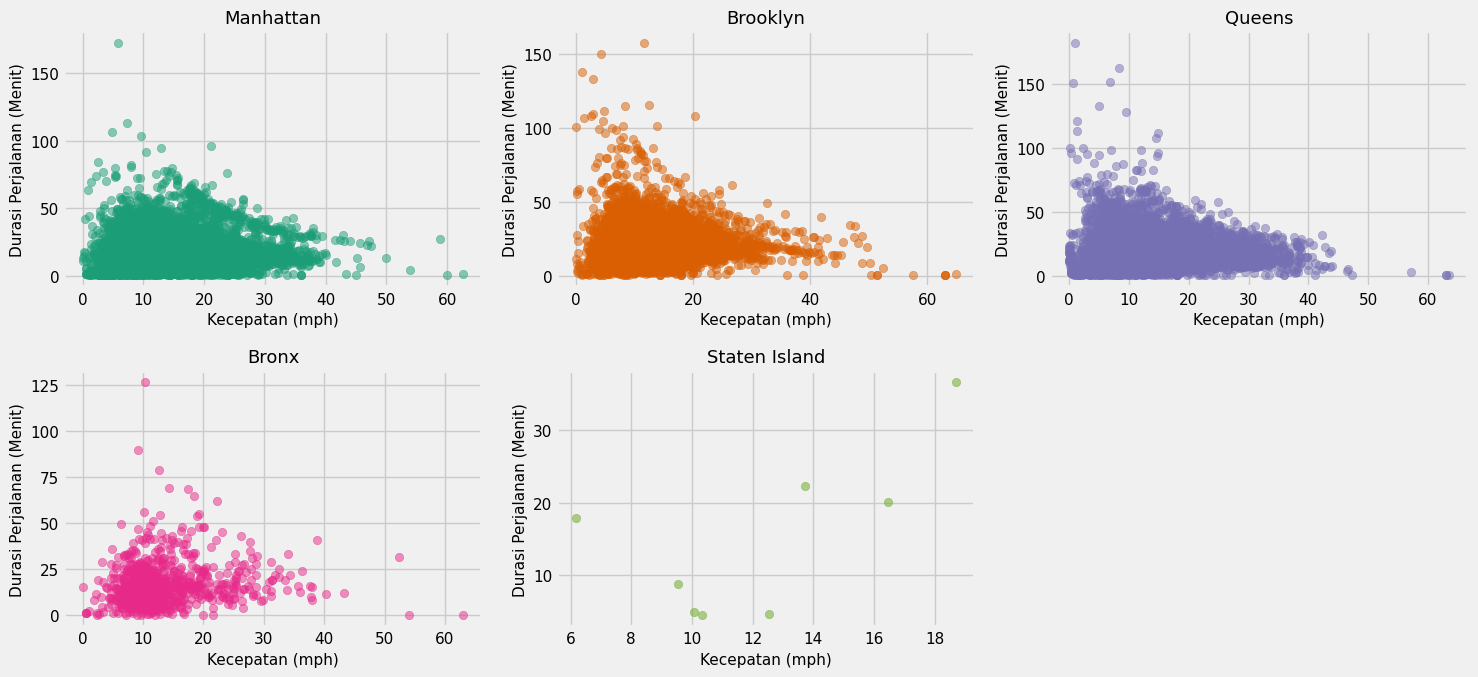

In [72]:
# mengidentifikasi kecepatan di setiap borough dengan trip_duration minute
plt.figure(figsize=(15, 7))
colors = sns.color_palette('Dark2', n_colors=len(df['pickup_borough'].unique()))
for i, borough in enumerate(df['pickup_borough'].unique()):
    plt.subplot(2, 3, i+1)
    subset = df[df['pickup_borough'] == borough]
    plt.scatter(subset['speed'], subset['trip_duration_minute'], label=borough, alpha=0.5, color=colors[i])
    plt.title(f'{borough}', fontsize=13)
    plt.xlabel('Kecepatan (mph)', fontsize=11)
    plt.ylabel('Durasi Perjalanan (Menit)', fontsize=11)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

In [73]:
# mengidentifikasi rata-rata kecepatan mph
avg_mph = df.groupby('trip_duration_minute')['speed'].mean().mean().round(2)
print(f'Rata-rata mph: {avg_mph}')

Rata-rata mph: 12.15


> **Data**: <br/>
> - Antara columns `speed` dan `trip_duration_minute`, semakin durasi perjalanan bertambah, kecepatan juga semakin menurun. Hal ini dapat diasumsikan dengan beberapa hal:
>   1. Adanya kemacetan lalu lintas yang memperlambat laju perkiraan kecepatan kendaraan,
>   2. Penumpang banyak berhenti selama perjalanan, hal ini dapat mempengaruhi informasi perkiraan kecepatan. 
>   3. Rute perjalanan mungkin tidak optimal, sehingga mengakibatkan peningkatan durasi perjalanan dan penurunan perkiraan kecepatan.
>
> - Hal ini tercermin dari berita yang menunjukan bahwa NYC memiliki rata-rata 12 mph saat peak hourm dan menjadi kota terburuk dengan tingkat kemacetan yang tinggi di US (artikel dipublish Maret, 2023): *"The Big Apple is currently ranked the worst city for congestion across the US – with drivers traveling at an average of just 12 miles per hour during peak times"*. Sumber: https://nypost.com/2023/03/13/nyc-drivers-travel-just-12-mph-during-rush-hour/

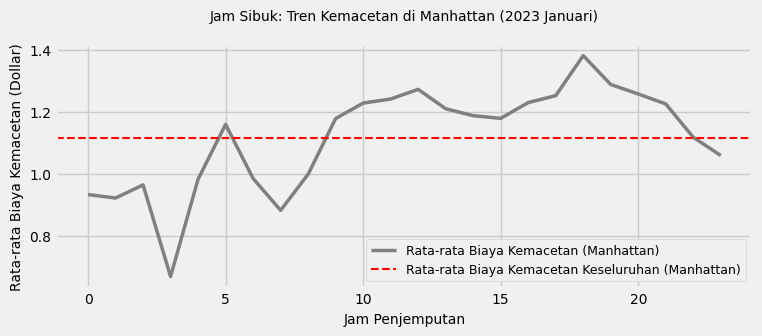

In [74]:
# mengidentifikasi jam-jam kemacetan di lokasi congestion_surcharge (Manhattan)
manhattan = df[df['pickup_borough'] == 'Manhattan']
congestion_hour = manhattan.groupby(manhattan['lpep_pickup_datetime'].dt.hour)['congestion_surcharge'].mean()
avg = congestion_hour.mean()

plt.figure(figsize=(8, 3))
sns.lineplot(x=congestion_hour.index, y=congestion_hour.values, color='grey', label='Rata-rata Biaya Kemacetan (Manhattan)', linewidth=2.5)
plt.axhline(avg, color='red', linestyle='--', label='Rata-rata Biaya Kemacetan Keseluruhan (Manhattan)', linewidth=1.5)
plt.xlabel('Jam Penjemputan', fontsize=10)
plt.ylabel('Rata-rata Biaya Kemacetan (Dollar)', fontsize=10)
plt.title('Jam Sibuk: Tren Kemacetan di Manhattan (2023 Januari)\n', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=9)
plt.show()

> **Disclaimer**:
> - Biaya tambahan ketika macet (congestion_surcharge) hanya berlaku di daerah Manhattan saja.
>
> **Insights**:
> - Jam rawan terjadinya macet pada daerah Manhattan terjadi antara sekitar jam 9 hingga sekitar jam 10 malam, antara pagi hingga malam. Dapat diasumsikan terjadinya jam-jam macet saat offiece hour hingga berakhirnya office hour di sekitar daerah Manhattan.
> - Setelah diidentifikasi ternyata pemberlakuan congestion surcharge menimbulkan protes dari kalangan driver: *"Taxi drivers have been organizing against congestion pricing - protesting outside of Gov. Kathy Hochul’s speech about scoring the final federal approval"*. Sumber: https://ny1.com/nyc/manhattan/transit/2023/06/28/taxi-drivers-bracing-for-second-congestion-fee-as-industry-struggles

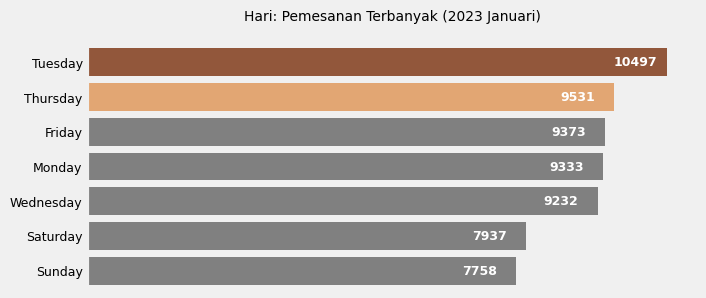

In [75]:
# mengidentifikasi hari-hari dengan pemesanan terbanyak
busiest_days = df.explode('passenger_count').groupby('weekday')['passenger_count'].count().reset_index().sort_values(by='passenger_count', ascending=False)

fig, ax = plt.subplots(figsize=(7, 3))
def custom_palette(series, max_color='sienna', max_color2='sandybrown', other_color='grey'):
    max_val = series.max()
    max_val2 = series.nlargest(2).iloc[-1]
    pal = []
    for item in series:
        if item == max_val:
            pal.append(max_color)
        elif item == max_val2:
            pal.append(max_color2)
        else:
            pal.append(other_color)
    return pal

palette = custom_palette(busiest_days['passenger_count'])
ax = sns.barplot(data=busiest_days, x='passenger_count', y='weekday', palette=palette, orient='h', hue='weekday')

for i in ax.containers:
    ax.bar_label(i, padding=-39, color='white', fontsize=9, label_type='edge', fontweight='bold')

plt.ylabel('')
plt.title('Hari: Pemesanan Terbanyak (2023 Januari)\n', size=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9) 
ax.xaxis.set_visible(False)
plt.show()

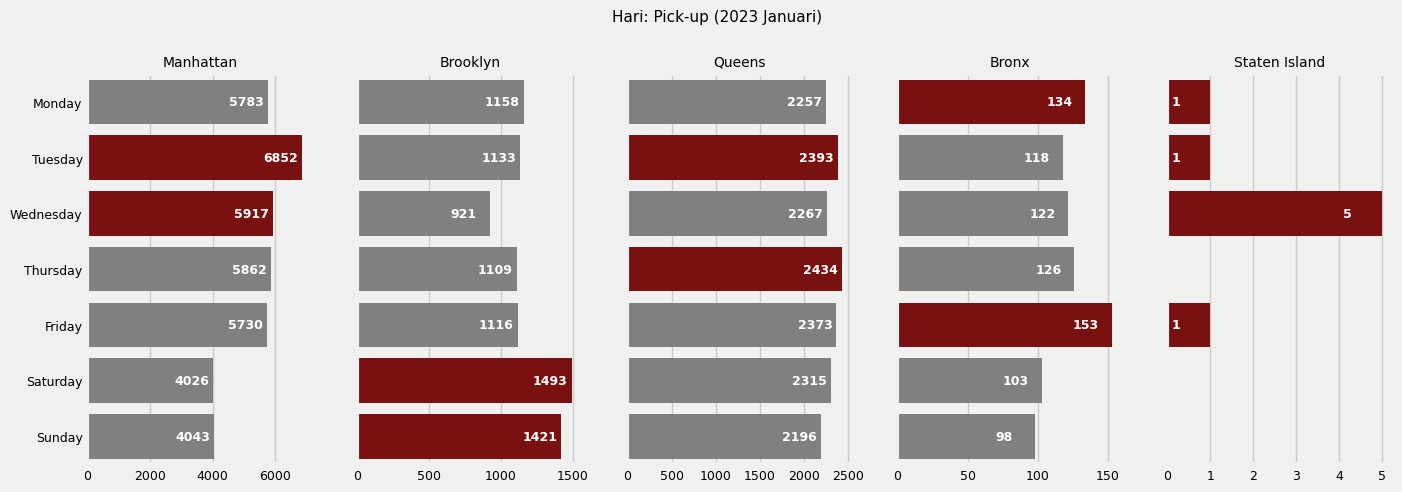

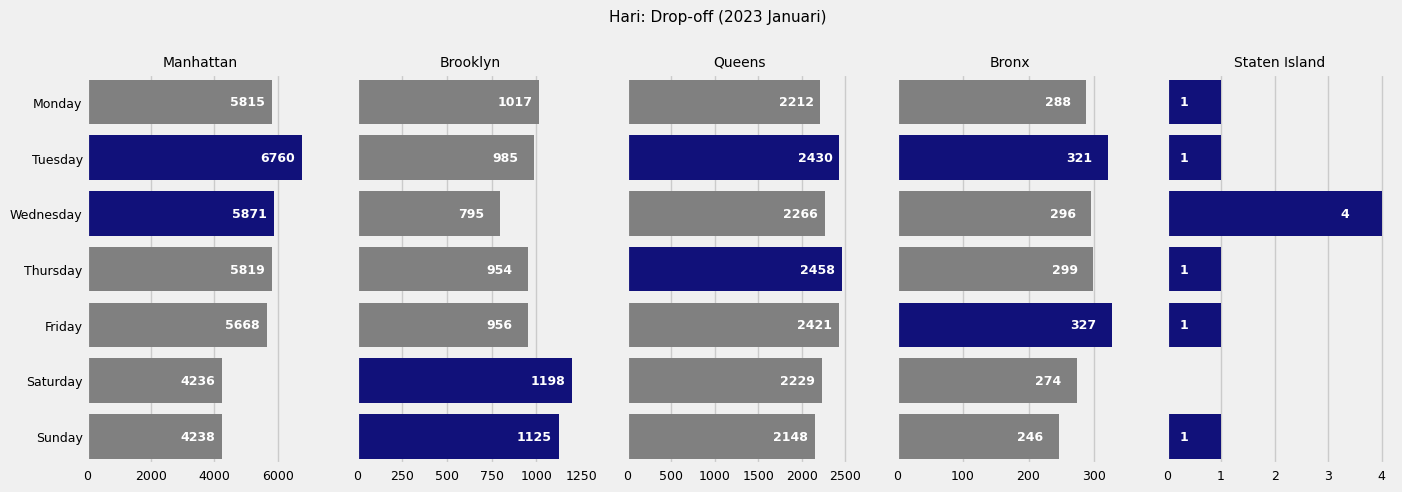

In [76]:
# mengidentifikasi hari-hari dengan pemesanan terbanyak berdasarkan borough
busiest_days_borough = df.groupby(['pickup_borough', 'weekday'])['passenger_count'].count().reset_index()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

def custom_palette(series, max_color='darkred', max_color2='darkred', other_color='grey'):
    max_val = series.max()
    max_val2 = series.nlargest(2).iloc[-1]
    pal = []
    for item in series:
        if item == max_val:
            pal.append(max_color)
        elif item == max_val2:
            pal.append(max_color2)
        else:
            pal.append(other_color)
    return pal

palette_dict = {}
for borough in df['pickup_borough'].unique():
    busiest_days_subset = busiest_days_borough[busiest_days_borough['pickup_borough'] == borough]
    palette_dict[borough] = custom_palette(busiest_days_subset['passenger_count'])

fig, axes = plt.subplots(nrows=1, ncols=len(df['pickup_borough'].unique()), figsize=(15, 5), sharey=True)

for i, borough in enumerate(df['pickup_borough'].unique()):
    data = busiest_days_borough[busiest_days_borough['pickup_borough'] == borough]
    palette = palette_dict[borough]
    sns.barplot(ax=axes[i], data=data, x='passenger_count', y='weekday', palette=palette, orient='h', hue='weekday', order=days)
    for j in axes[i].containers:
        axes[i].bar_label(j, padding=-28, color='white', fontsize=9, label_type='edge', fontweight='bold')
    axes[i].set_title(f'{borough}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='both', labelsize=9)

plt.suptitle('Hari: Pick-up (2023 Januari)\n\n', fontsize=11)
plt.subplots_adjust(top=0.85)
plt.show()


# mengidentifikasi hari-hari dengan pemesanan terbanyak berdasarkan borough
busiest_days_borough = df.groupby(['dropoff_borough', 'weekday'])['passenger_count'].count().reset_index()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

def custom_palette(series, max_color='darkblue', max_color2='darkblue', other_color='grey'):
    max_val = series.max()
    max_val2 = series.nlargest(2).iloc[-1]
    pal = []
    for item in series:
        if item == max_val:
            pal.append(max_color)
        elif item == max_val2:
            pal.append(max_color2)
        else:
            pal.append(other_color)
    return pal

palette_dict = {}
for borough in df['dropoff_borough'].unique():
    busiest_days_subset = busiest_days_borough[busiest_days_borough['dropoff_borough'] == borough]
    palette_dict[borough] = custom_palette(busiest_days_subset['passenger_count'])

fig, axes = plt.subplots(nrows=1, ncols=len(df['dropoff_borough'].unique()), figsize=(15, 5), sharey=True)

for i, borough in enumerate(df['dropoff_borough'].unique()):
    data = busiest_days_borough[busiest_days_borough['dropoff_borough'] == borough]
    palette = palette_dict[borough]
    sns.barplot(ax=axes[i], data=data, x='passenger_count', y='weekday', palette=palette, orient='h', hue='weekday', order=days)
    for j in axes[i].containers:
        axes[i].bar_label(j, padding=-30, color='white', fontsize=9, label_type='edge', fontweight='bold')
    axes[i].set_title(f'{borough}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='both', labelsize=9)

plt.suptitle('Hari: Drop-off (2023 Januari)\n\n', fontsize=11)
plt.subplots_adjust(top=0.85)
plt.show()

In [77]:
# mengidentifikasi borough dengan banyak penumpang
top_pickup_borough = df.groupby('pickup_borough')['passenger_count'].count().reset_index()
top_pickup_borough = top_pickup_borough.sort_values(by='passenger_count', ascending=False)
display(top_pickup_borough)

# mengidentifikasi lokasi tujuan borough terbanyak 
top_dropoff_borough = df.groupby('dropoff_borough')['passenger_count'].count().reset_index()
top_dropoff_borough = top_dropoff_borough.sort_values(by='passenger_count', ascending=False)
display(top_dropoff_borough)

,pickup_borough,passenger_count
2,Manhattan,38213
3,Queens,16235
1,Brooklyn,8351
0,Bronx,854
4,Staten Island,8


,dropoff_borough,passenger_count
2,Manhattan,38407
3,Queens,16164
1,Brooklyn,7030
0,Bronx,2051
4,Staten Island,9


> **Insights**:
> - Kecara keseluruhan Manhattan merupakan borough dengan pemesanan dan lokasi tujuan terbanyak. Hal ini terjadi karena Manhattan merupakan borough yang memiliki banyak destinasi yang menarik wisatawan lokal maupun internasional. Banyak lokasi popular yang berada di kawasan Manhattan, seperti Empire State Building, the Rockefeller Center, Chrysler Building, dan Times Square.
> - Staten Island merupakan borough dengan pemesanan dan lokasi terendah. Hal ini terjadi karena wilayah Staten Island yang terpisah dari semua borough dan hanya dapat diakses menggunakan kapal feri, serta kurangnya destinasi yang memikat wisatawan.
> - Antara pick up and drop off hampir sama-sama memiliki jumlah yang sama. Dapat diasumsikan hal ini terjadi karena 
> - Secara keselruhan hari Selasa merupakan hari dengan pemesanan terbanyak, dan hari Minggu merupakan hari dengan pemesanan terendah. Hal ini dapat diasumsikan karena Selasa merupakan week day di mana banyak orang berkegiatan di luar rumah, sedangkan hari Minggu merupakan hari di mana banyak orang lebih memilih menghabiskan waktunya di rumah atau menggunakan kendaraan pribadi.

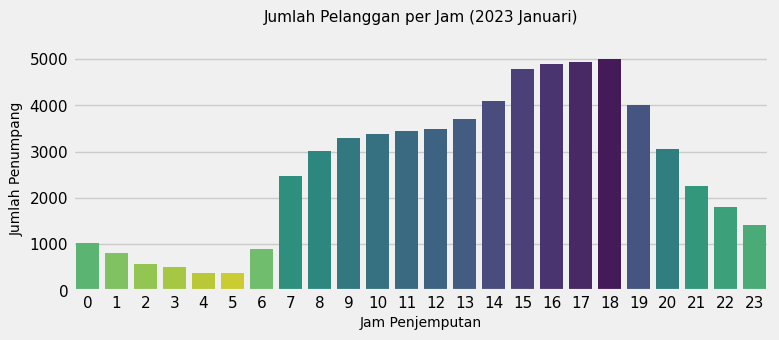

In [78]:
# mengidentifikasi jumlah penumpang per jam
busy_hour = df.groupby(df['lpep_pickup_datetime'].dt.hour)['passenger_count'].count().sort_values(ascending=False).reset_index()
color = sns.color_palette('viridis', n_colors=len(busy_hour))[::-1]
plt.figure(figsize=(8, 3))
sns.barplot(x='lpep_pickup_datetime', y='passenger_count', data=busy_hour, palette=color, hue='passenger_count', legend=False)
plt.xlabel('Jam Penjemputan', fontsize=10)
plt.ylabel('Jumlah Penumpang', fontsize=10)
plt.title('Jumlah Pelanggan per Jam (2023 Januari)\n', fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

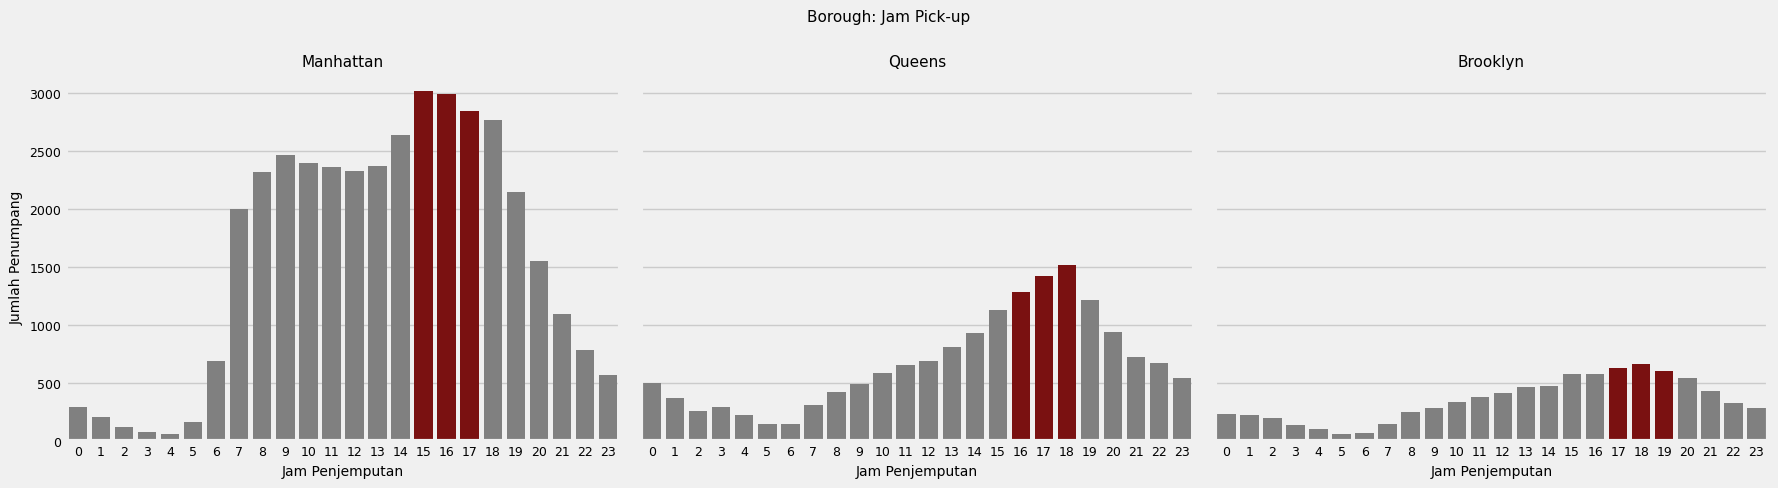

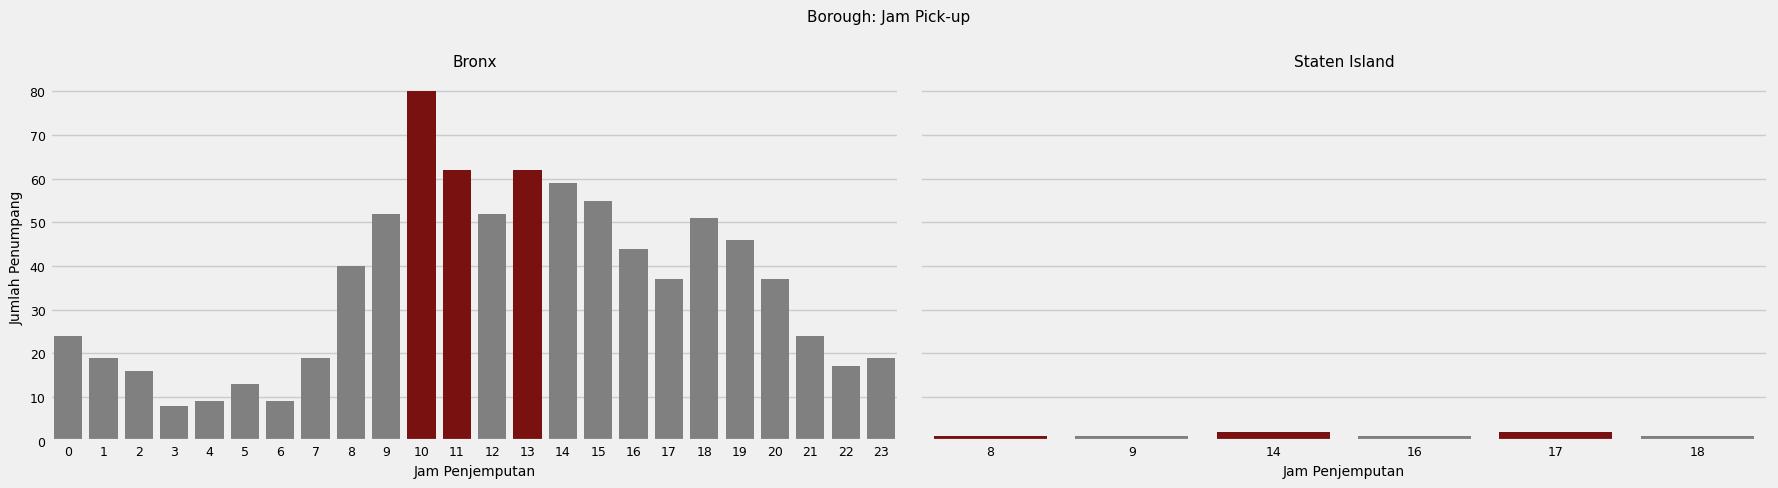

In [79]:
# mengidentifikasi 3 borough degnan tingkat pemesanan tertinggi
selected_boroughs = ['Manhattan', 'Queens', 'Brooklyn']
df_selected_boroughs = df[df['pickup_borough'].isin(selected_boroughs)]

busy_hour_borough = df_selected_boroughs.groupby(['pickup_borough', df_selected_boroughs['lpep_pickup_datetime'].dt.hour])['passenger_count'].count().reset_index()
top_hours = busy_hour_borough.groupby('pickup_borough')['passenger_count'].nlargest(3).reset_index()
top_hours_index = top_hours['level_1'].values

fig, axes = plt.subplots(nrows=1, ncols=len(selected_boroughs), figsize=(18, 5), sharey=True)
for i, borough in enumerate(selected_boroughs):
    data = busy_hour_borough[busy_hour_borough['pickup_borough'] == borough]
    color = ['darkred' if idx in top_hours_index else 'gray' for idx in data.index]
    sns.barplot(ax=axes[i], x='lpep_pickup_datetime', y='passenger_count', data=data, palette=color, hue='lpep_pickup_datetime')
    axes[i].set_title(f'{borough}', fontsize=11)
    axes[i].set_xlabel('Jam Penjemputan', fontsize=10)
    axes[i].set_ylabel('Jumlah Penumpang', fontsize=10)
    axes[i].tick_params(axis='both', labelsize=9)
    axes[i].legend().set_visible(False)

plt.tight_layout()
plt.suptitle('Borough: Jam Pick-up', fontsize=11)
plt.subplots_adjust(top=0.85)
plt.show()


# mengidentifikasi 2 borough degnan tingkat pemesanan terendah
selected_boroughs = ['Bronx', 'Staten Island']
df_selected_boroughs = df[df['pickup_borough'].isin(selected_boroughs)]

busy_hour_borough = df_selected_boroughs.groupby(['pickup_borough', df_selected_boroughs['lpep_pickup_datetime'].dt.hour])['passenger_count'].count().reset_index()
top_hours = busy_hour_borough.groupby('pickup_borough')['passenger_count'].nlargest(3).reset_index()
top_hours_index = top_hours['level_1'].values

fig, axes = plt.subplots(nrows=1, ncols=len(selected_boroughs), figsize=(18, 5), sharey=True)
for i, borough in enumerate(selected_boroughs):
    data = busy_hour_borough[busy_hour_borough['pickup_borough'] == borough]
    color = ['darkred' if idx in top_hours_index else 'gray' for idx in data.index]
    sns.barplot(ax=axes[i], x='lpep_pickup_datetime', y='passenger_count', data=data, palette=color, hue='lpep_pickup_datetime')
    axes[i].set_title(f'{borough}', fontsize=11)
    axes[i].set_xlabel('Jam Penjemputan', fontsize=10)
    axes[i].set_ylabel('Jumlah Penumpang', fontsize=10)
    axes[i].tick_params(axis='both', labelsize=9)
    axes[i].legend().set_visible(False) 

plt.tight_layout()
plt.suptitle('Borough: Jam Pick-up', fontsize=11)
plt.subplots_adjust(top=0.85)
plt.show()

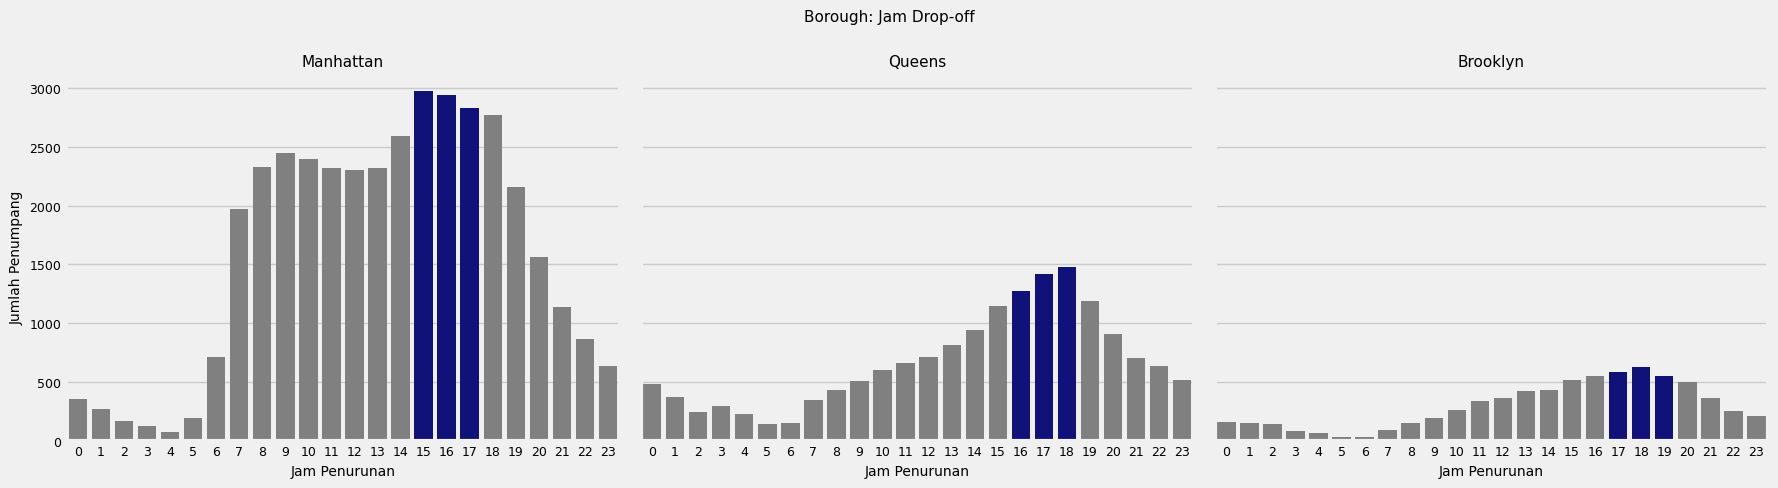

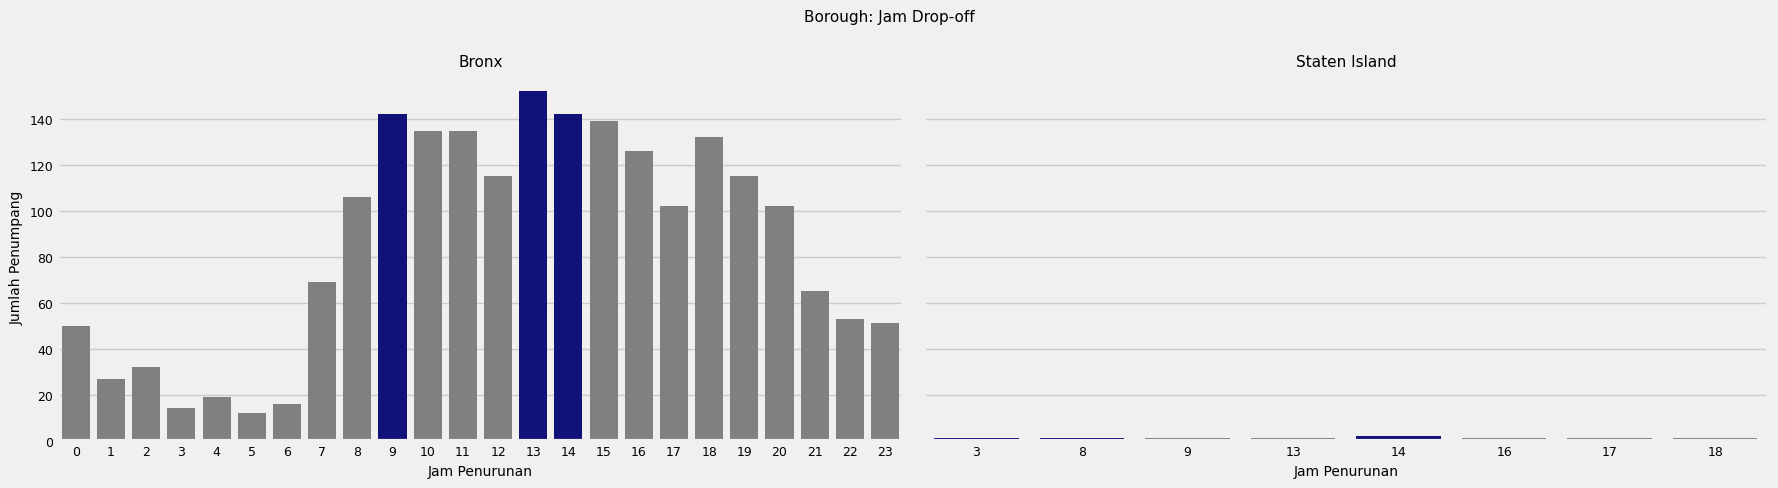

In [80]:
# mengidentifikasi 3 borough degnan tingkat pemesanan tertinggi
selected_boroughs = ['Manhattan', 'Queens', 'Brooklyn']
df_selected_boroughs = df[df['dropoff_borough'].isin(selected_boroughs)]

busy_hour_borough = df_selected_boroughs.groupby(['dropoff_borough', df_selected_boroughs['lpep_pickup_datetime'].dt.hour])['passenger_count'].count().reset_index()
top_hours = busy_hour_borough.groupby('dropoff_borough')['passenger_count'].nlargest(3).reset_index()
top_hours_index = top_hours['level_1'].values

fig, axes = plt.subplots(nrows=1, ncols=len(selected_boroughs), figsize=(18, 5), sharey=True)
for i, borough in enumerate(selected_boroughs):
    data = busy_hour_borough[busy_hour_borough['dropoff_borough'] == borough]
    color = ['darkblue' if idx in top_hours_index else 'gray' for idx in data.index]
    sns.barplot(ax=axes[i], x='lpep_pickup_datetime', y='passenger_count', data=data, palette=color, hue='lpep_pickup_datetime')
    axes[i].set_title(f'{borough}', fontsize=11)
    axes[i].set_xlabel('Jam Penurunan', fontsize=10)
    axes[i].set_ylabel('Jumlah Penumpang', fontsize=10)
    axes[i].tick_params(axis='both', labelsize=9)
    axes[i].legend().set_visible(False)

plt.tight_layout()
plt.suptitle('Borough: Jam Drop-off', fontsize=11)
plt.subplots_adjust(top=0.85)
plt.show()


# mengidentifikasi 2 borough degnan tingkat pemesanan terendah
selected_boroughs = ['Bronx', 'Staten Island']
df_selected_boroughs = df[df['dropoff_borough'].isin(selected_boroughs)]

busy_hour_borough = df_selected_boroughs.groupby(['dropoff_borough', df_selected_boroughs['lpep_pickup_datetime'].dt.hour])['passenger_count'].count().reset_index()
top_hours = busy_hour_borough.groupby('dropoff_borough')['passenger_count'].nlargest(3).reset_index()
top_hours_index = top_hours['level_1'].values

fig, axes = plt.subplots(nrows=1, ncols=len(selected_boroughs), figsize=(18, 5), sharey=True)
for i, borough in enumerate(selected_boroughs):
    data = busy_hour_borough[busy_hour_borough['dropoff_borough'] == borough]
    color = ['darkblue' if idx in top_hours_index else 'gray' for idx in data.index]
    sns.barplot(ax=axes[i], x='lpep_pickup_datetime', y='passenger_count', data=data, palette=color, hue='lpep_pickup_datetime')
    axes[i].set_title(f'{borough}', fontsize=11)
    axes[i].set_xlabel('Jam Penurunan', fontsize=10)
    axes[i].set_ylabel('Jumlah Penumpang', fontsize=10)
    axes[i].tick_params(axis='both', labelsize=9)
    axes[i].legend().set_visible(False) 

plt.tight_layout()
plt.suptitle('Borough: Jam Drop-off', fontsize=11)
plt.subplots_adjust(top=0.85)
plt.show()

> **Insights**:
> - Secara keseluruhan jam tersibuk terjadi menjelang sore (jam 15.00 hingga 18.00).
> - Tiap borough memiliki jam sibuk untuk penjempputan yang cukup berbeda-beda, dan memiliki jam sibuk untuk penurunan penumpang yang serupa.

In [81]:
# mengidentifikasi durasi perjalanan non-cash dan cash
payment = df[(df['payment_type'] == 1) | (df['payment_type'] == 2)]
non_cash = payment[payment['payment_type'] == 1]['trip_duration_minute']
cash = payment[payment['payment_type'] == 2]['trip_duration_minute']

mean_non_cash = np.mean(non_cash)
median_non_cash = np.median(non_cash)
print(f"Mean Durasi Perjalanan (Non-Tunai): {mean_non_cash:.2f} menit")
print(f"Median Durasi Perjalanan (Non-Tunai): {median_non_cash:.2f} menit")

mean_cash = np.mean(cash)
median_cash = np.median(cash)
print(f"\nMean Durasi Perjalanan (Tunai): {mean_cash:.2f} menit")
print(f"Median Durasi Perjalanan (Tunai): {median_cash:.2f} menit")

Mean Durasi Perjalanan (Non-Tunai): 13.82 menit
Median Durasi Perjalanan (Non-Tunai): 11.78 menit

Mean Durasi Perjalanan (Tunai): 13.33 menit
Median Durasi Perjalanan (Tunai): 10.72 menit


In [82]:
# melakukan uji t untuk mengetahui apakah ada perbedaan signifikan rata-rata durasi perjalanan antara pelanggan yang membayar dengan tunai dan non-tunai
from scipy.stats import ttest_ind

payment = df[(df['payment_type'] == 1) | (df['payment_type'] == 2)]
non_cash = payment[payment['payment_type'] == 1]['trip_duration_minute']
cash = payment[payment['payment_type'] == 2]['trip_duration_minute']

t_stat, p_value = ttest_ind(non_cash, cash, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value/2}")

alpha = 0.05
if p_value < alpha:
    print('Menolak H0: Ada perbedaan signifikan dalam rata-rata durasi perjalanan dengan pembayaran non-tunai dan tunai')
else:
    print('Gagal menolak H0: Tidak ada perbedaan signifikan dalam rata-rata durasi perjalanan dengan pembayaran non-tunai dan tunai')

T-statistic: 5.727420667177455
P-value: 5.137402190514841e-09
Menolak H0: Ada perbedaan signifikan dalam rata-rata durasi perjalanan dengan pembayaran non-tunai dan tunai


> - **Insights**: <br/>
>  Meskipun perubahan dalam mean dan median durasi perjalanan antara pelanggan non-tunai dan tunai terlihat kecil, hasil uji statistik menunjukkan perbedaan tersebut signifikan secara statistik.. Informasi ini dapat membantu dalam memahami preferensi pilihan pembayaran terhadap durasi perjalanan.

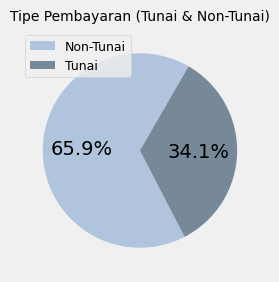

In [88]:
# mengidentifikasi persentase payment type non-tunai dan tunai
plt.figure(figsize=(4, 3))

non_cash = df[df['payment_type'] == 1]
cash = df[df['payment_type'] == 2]
percentage_non_cash = len(non_cash) / len(df) * 100
percentage_cash = len(cash) / len(df) * 100

labels = ['Non-Tunai', 'Tunai']
sizes = [percentage_non_cash, percentage_cash]
colors = ['lightsteelblue', 'lightslategray']
patches, texts, autotexts = plt.pie(sizes, labels=None, colors=colors, autopct='%1.1f%%', startangle=60)
plt.legend(patches, labels, loc="upper left", fontsize=9)
plt.title('Tipe Pembayaran (Tunai & Non-Tunai)', fontsize=10)
plt.show()

In [84]:
# mengidentifikasi persentase tipe perjalanan 
street_hail = df[df['trip_type'] == 1]
dispatch = df[df['trip_type'] == 2]
percent_street_hail = (len(street_hail) / len(df) * 100)
percent_dispatch = (len(dispatch) / len(df) * 100)
print(f'Proporsi street-hail: {percent_street_hail}')
print(f'Proporsi dispatch: {percent_dispatch}')

Proporsi street-hail: 97.87939240665399
Proporsi dispatch: 2.1206075933460045


In [85]:
# mengidentifikasi persentase antara pickup_service_zone dan dropoff_service_zone untuk lokasi airports
airport_pickup = df[df['pickup_service_zone'] == 'Airports']
airport_dropoff = df[df['dropoff_service_zone'] == 'Airports']

percent_pickup_airport = (len(airport_pickup) / len(df) * 100)
percent_dropoff_airport = (len(airport_dropoff) / len(df) * 100)

print(f'Proporsi pickup_service_zone (airports): {percent_pickup_airport}')
print(f'Proporsi dropoff_service_zone (airports): {percent_dropoff_airport}')

Proporsi pickup_service_zone (airports): 0.020420665713702265
Proporsi dropoff_service_zone (airports): 2.7976312027772106


> **Data**:
> - Tipe pembayaran terbanyak adalah non-tunai (credit card/debit)
> - Tipe perjalanan terbanyak adalah street-hail atau memesan kendaraan secara langsung tanpa memesan melalui aplikasi.
> - Proporsi lokasi airport lebih dominan dropoff atau sebagai destinasi tujuan, dibandingkan untuk tempat penjemputan.

## **Actionable Insights**

1. **Optimasi efisiensi transportasi**: <br/>
    Bagaimana NYC TLC dapat meningkatkan efisiensi operasional industri transportasi di New York City untuk menciptakan lingkungan yang lebih efisien bagi semua pihak yang terlibat, termasuk pengemudi dan penumpang?

    **Actionable insights**: <br/>
    - Bekerja sama dengan pihak berwenang dan perusahaan taksi untuk mengembangkan kebijakan tarif yang lebih akurat berdasarkan hubungan antara durasi perjalanan dan jarak tempuh. Hal ini dapat membantu menciptakan model tarif yang lebih adil dan kompetitif.
    - Menempatkan lebih banyak kendaraan di sekitar lokasi penjemputan terpopuler, terutama pada jam-jam sibuk, dapat meningkatkan responsibilitas dan meminimalkan waktu tunggu pelanggan (disesuaikan dengan jam-jam sibuk tiap borough).
<br/>

2. **Analisis pola operasional pengemudi**: <br/>
    Bagaimana NYC TLC dapat lebih memahami pola operasional pengemudi, termasuk waktu dan lokasi yang sering digunakan, untuk memberikan insight regulasi yang lebih baik, sehingga meningkatkan layanan?

    **Actionable insights**: <br/>

    - Menerapkan tarif dinamis yang lebih tinggi di area dengan penjemputan atau penurunan yang populer pada waktu-waktu tertentu dapat menjadi insentif bagi pengemudi untuk beroperasi di area tersebut.
    -  Melakukan peninjauan ulang terhadap kebijakan congestion surcharge dan mempertimbangkan opsi penyesuaian tarif atau pengecualian tertentu untuk mengurangi beban keuangan bagi driver dan memberlakukan insentif khusus bagi driver.
<br/>

3. **Peningkatan pengalaman pelanggan**: <br/>
    Bagaimana NYC TLC dapat meningkatkan pengalaman penumpang dengan memahami preferensi penumpnag?

    **Actionable insights**: <br/>
    - Mempertimbangkan kemitraan dengan penyedia layanan pembayaran digital seperti e-wallet atau aplikasi pembayaran populer dapat memperluas pilihan pembayaran dan memenuhi kebutuhan pelanggan yang beragam.
    - Menggunakan data pelanggan untuk memberikan diskon yang disesuaikan atau penawaran spesial berdasarkan riwayat perjalanan mereka dan menawarkan layanan dispatch pada pelanggan yang belum pernah mencobanya, guna menarik perhatian pelanggan terhadap trip type dispatch (memberikan pengalaman baru bagi pelanggan).